# Fraud Detection Project

## Collaboration Plan
**Participants:** Ryan Tang and Santiago von Straussburg

**Github Page**: https://ryantangmj.github.io

### Overview
We are collaboratively analyzing two fraud datasets to explore fraud patterns, feature importance, and machine learning model evaluation.

- **First dataset:** `Cargo_fraud_only.csv`, obtained from [UCR Database](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)
- **Second dataset:** Yearly Unemployment Index by State, obtained from [BLS Database](https://data.bls.gov/lausmap/showMap.jsp)
- **Third dataset:** Housing Price Index by State, obtained from [FHFA Database](https://www.fhfa.gov/data/hpi/datasets?tab=additional-data)
- **Fourth dataset:** Poverty Statistics by State, obtained from [US Census Bureau Database](https://www.census.gov/data/tables/timeseries/demo/income-poverty/historical-poverty-people.html)
- **Fifth dataset:** Homelessness Statistics by State, obtained from [Office of Policy Development and Research Database](https://www.huduser.gov/portal/datasets/ahar/2023-ahar-part-1-pit-estimates-of-homelessness-in-the-us.html)


### Technologies Used
1. **GitHub Repository**: For version control, code collaboration, and final project hosting.
2. **Google Colab/Jupyter Notebooks**: For ETL, EDA, and model development.
3. **Discord**: Primary communication platform for real-time discussions.
   - Weekly meetings at 08:00 PM CST on Thursdays for progress reviews and planning.

### Current Focus
Both team members are currently working together on data exploration, including Extraction, Transformation, and Load (ETL) processes, as well as Exploratory Data Analysis (EDA).

### Roadmap & Milestones
#### Milestone 1 – Initial Dataset Selection & ETL
- Identify datasets. - **Completed**
- Perform initial ETL on datasets. - **Completed**
- Establish a GitHub repository and GitHub Pages site. - **Completed**
- Develop basic statistics and initial graph for dataset understanding. - **Completed**

#### Milestone 2 – Additional ETL & Exploratory Data Analysis
- Continue data cleaning and transformation. - **Completed**
- Conduct comprehensive EDA with 3-5 key graphs. - **Completed**
- Present the first project pitch with initial findings. - **Completed**

#### Deliverable 1 – In-Class Presentation
- Finalize and present a 5-7 slide deck covering problem statement, ETL, EDA, and project progress. - **Completed**

#### Milestone 3 – Model Development & Evaluation
- Select machine learning models (Random Forest, XGBoost, Logistic Regression). - **Completed**
- Begin model training and evaluation. - **Completed**
- Analyze model performance and feature importance. - **Completed**

#### Deliverable 2 – Final Website & Presentation
- Finalize project with the deployment of results to the GitHub Pages site. - **Completed**
- Prepare the final presentation summarizing the project lifecycle. - **Completed**

---

## Project Goals

The goal of this collaborative project is to analyze fraud patterns, identify significant features contributing to fraud, and evaluate various machine learning models for fraud detection. By leveraging two distinct datasets, we aim to develop a deep understanding of fraudulent behavior and build predictive models that will aid in identifying and mitigating fraud across different sectors. Specifically, our objectives are as follows:

### 1. Fraud Pattern Analysis
- **Objective:** Investigate patterns and trends in fraud activities across different sectors, particularly cargo-related fraud and arrest data for fraud cases. This will involve examining how fraudulent activities vary over time and geographic locations, and identifying key factors that influence fraud prevalence.

### 2. Feature Importance Assessment
- **Objective:** Analyze and rank the importance of different features contributing to fraud detection. By evaluating features such as transaction details, timestamps, geographic data, and socio-economic indicators, we aim to pinpoint the key variables that can most accurately predict fraud occurrences.

### 3. Machine Learning Model Development & Evaluation
- **Objective:** Develop and compare multiple machine learning models (Random Forest, XGBoost, Logistic Regression) to identify the most effective model for predicting fraud cases. The models will be evaluated on their performance using metrics such as accuracy, precision, recall, and F1-score to ensure robust fraud detection capabilities.

### 4. Comprehensive Data Analysis
- **Objective:** Through thorough data exploration and analysis, we aim to create a holistic view of fraud activities, utilizing exploratory data analysis (EDA) techniques. This will include visualizing fraud trends, uncovering hidden relationships, and establishing baseline statistics.

### 5. Actionable Insights & Final Presentation
- **Objective:** By the end of the project, we aim to deliver a comprehensive set of insights that can inform decision-making regarding fraud prevention and detection strategies. These findings will be shared through a final presentation and a dedicated project website hosted via GitHub Pages.


In [1]:
# ==============================================
# 1. Import Libraries
# ==============================================

import json
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from scipy import stats
from io import StringIO, BytesIO
from bs4 import BeautifulSoup
from pprint import pprint
from scipy.stats import linregress
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Fetching the cargo fraud data that has been uploaded to our GitHub Repository
cargo_fraud = pd.read_csv("https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/refs/heads/main/cargo_fraud_only.csv", index_col=0)
cargo_fraud = cargo_fraud.reset_index()
cargo_fraud.head()

,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
1,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
2,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
3,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
4,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Commercial/Office Building,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25


In [3]:
# Filtering out fraud data only
cargo_fraud = cargo_fraud[cargo_fraud["offense_name"].isin(["Credit Card/Automated Teller Machine Fraud", 
                                              "Wire Fraud", 
                                              "Welfare Fraud"])]
cargo_fraud.head()

,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
349,2012,SC0200000,Fairfield,NaN,County,SC,South Carolina,South Atlantic,FAIRFIELD,South,...,Convenience Store,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN
352,2012,SC0200000,Fairfield,NaN,County,SC,South Carolina,South Atlantic,FAIRFIELD,South,...,Residence/Home,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN
354,2012,SC0220200,Georgetown,NaN,City,SC,South Carolina,South Atlantic,GEORGETOWN,South,...,Shopping Mall,NaN,NaN,71.0,71.0,"Metals, Non-Precious",500.0,0,False,NaN
433,2012,TN0320100,Morristown,NaN,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",South,...,Department/Discount Store,NaN,NaN,19.0,19.0,Merchandise,1066.0,0,False,NaN
512,2014,MI8121800,Ann Arbor,NaN,City,MI,Michigan,East North Central,WASHTENAW,Midwest,...,Service/Gas Station,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN


#### Initial Exploratory Data Analysis (EDA)

#### Geographic Analysis Overview
We initiated our study with a comprehensive **Exploratory Data Analysis (EDA)** focusing on fraud occurrences across various American regions [[3]]. This systematic approach helped us:
- Identify geographical patterns in fraudulent activity
- Analyze regional fraud distribution
- Establish baseline understanding of fraud prevalence

#### Regional Analysis Objectives
Our geographical analysis aimed to uncover several key aspects:

1. **Fraud Hotspots**
   - Identification of high-risk areas
   - Pattern recognition in fraud distribution
   - Temporal variations by region

2. **Regional Risk Factors**
   - Population density impacts
   - Economic condition correlations
   - Technology access influence

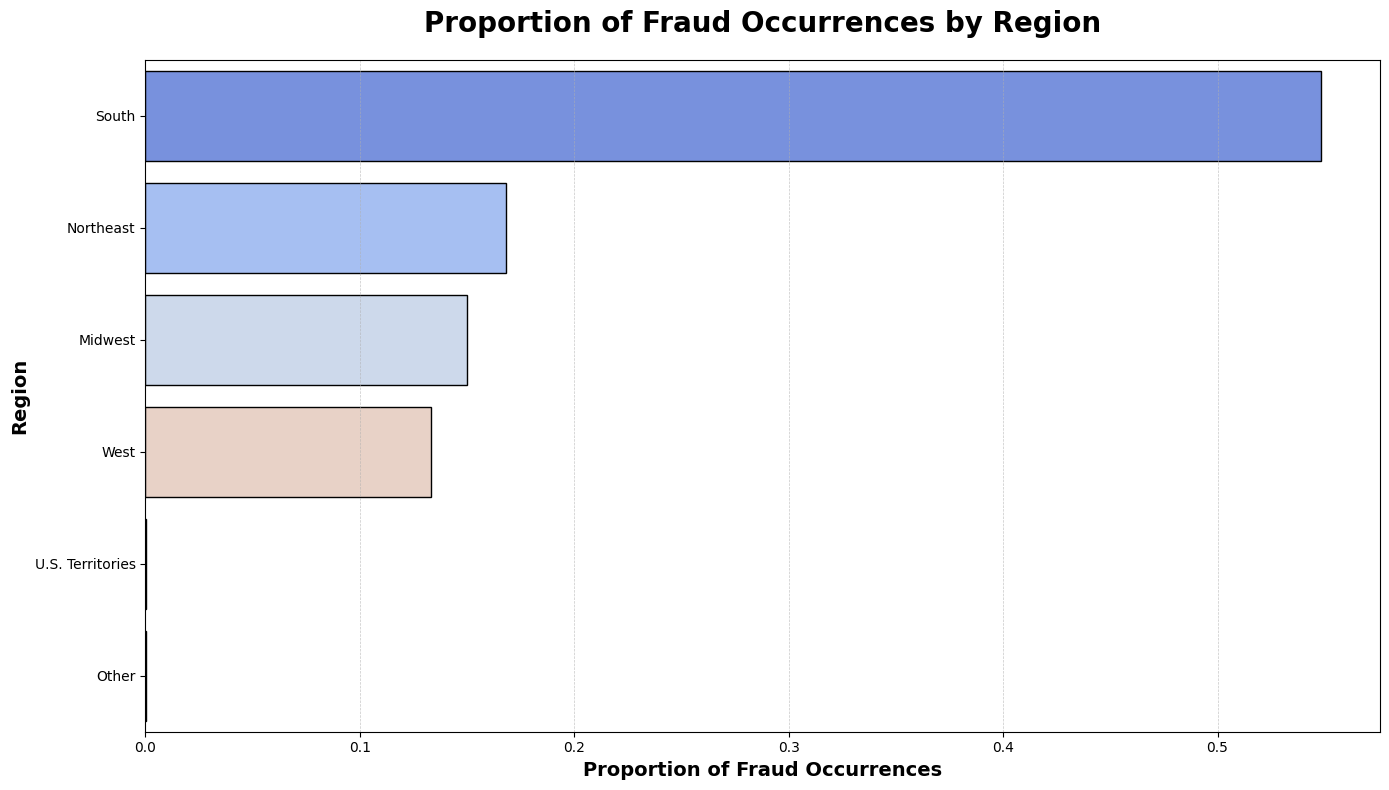

In [4]:
# Calculate the proportion of fraud by region
fraud_by_state = cargo_fraud['region_name'].value_counts(normalize=True).sort_values(ascending=False)

# Proportion of Fraud by Region with Enhanced Visualization
plt.figure(figsize=(14, 8))
sns.barplot(x=fraud_by_state.values, y=fraud_by_state.index, palette="coolwarm", edgecolor="black")
plt.title("Proportion of Fraud Occurrences by Region", fontsize=20, weight="bold", pad=20)
plt.xlabel("Proportion of Fraud Occurrences", fontsize=14, weight="bold")
plt.ylabel("Region", fontsize=14, weight="bold")
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#### State-Level Analysis

#### Detailed Geographic Investigation
After observing **significant regional variations** in fraud occurrences, we conducted a more granular analysis at the state level. This deeper investigation aimed to:
- Identify states with notable fraud rates
- Analyze state-specific patterns
- Detect potential outliers in fraud occurrence

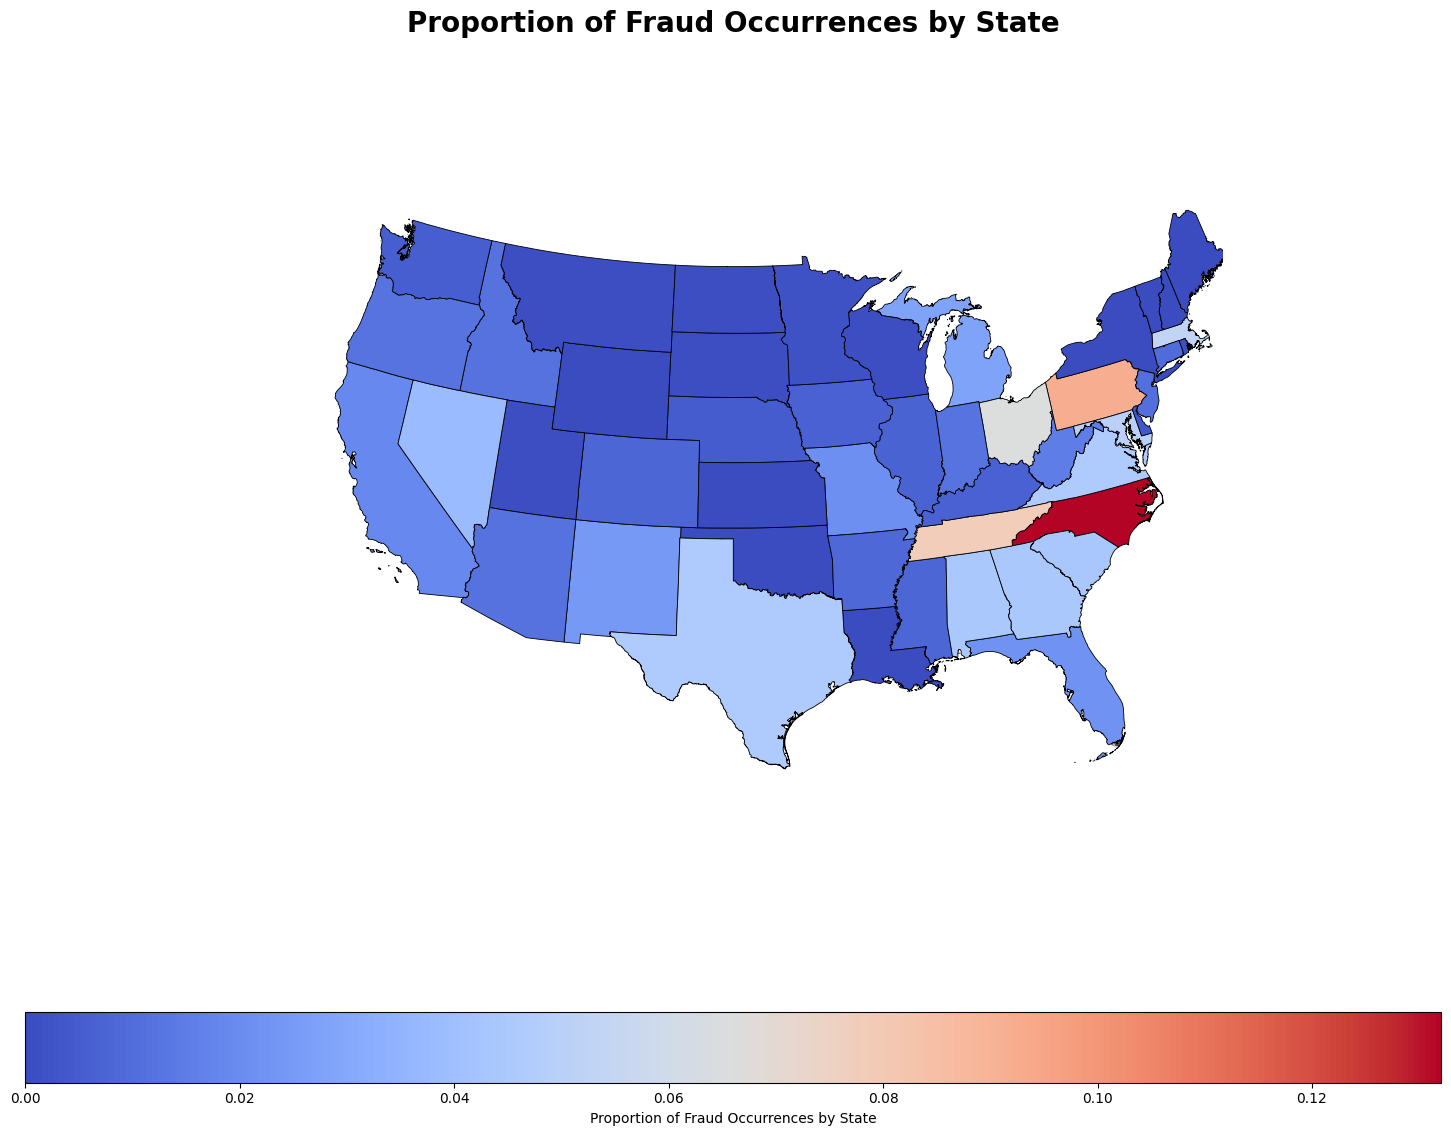

In [5]:
# Calculate the proportion of fraud by state
fraud_by_state = cargo_fraud['state_name'].value_counts(normalize=True).sort_values(ascending=False)

# Retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# Merge the geopandas file and fraud data
merged = usa.merge(fraud_by_state, how='left', left_on='NAME', right_on='state_name')
merged['proportion'] = merged['proportion'].fillna(0)

# Exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI'])]

# Reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# Enhanced Map Visualization for Fraud by State
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
visframe.plot(
    column='proportion', cmap='coolwarm', linewidth=0.6,
    ax=ax, edgecolor='black', legend=True,
    legend_kwds={
        'label': "Proportion of Fraud Occurrences by State",
        'orientation': "horizontal",
        'shrink': 0.8
    }
)
ax.set_xlim([-2.5e6, 2.5e6])
ax.set_ylim([-2.5e6, 1.5e6])
ax.set_axis_off()
ax.set_title('Proportion of Fraud Occurrences by State', fontsize=20, weight="bold", pad=20)
plt.tight_layout()
plt.show()

#### Key Observation
Our geo plot revealed **significant disparities** in fraud occurrences across different states within the United States, highlighting substantial variations despite shared national governance.

#### Demographic and Victim Analysis

#### Multifaceted Investigation
We expanded our analysis to examine additional critical factors in our dataset:
- Racial demographics
- Victim type classifications
- Associated fraud patterns

#### Race-Based Analysis
Our investigation into racial factors aimed to:
- Identify potential disparities in fraud victimization
- Analyze patterns across different racial groups
- Understand systemic factors influencing fraud exposure
- Examine demographic vulnerabilities

#### Victim Type Classification
The analysis of victim types focused on:
- Individual victims
- Business entities
- Organizational targets
- Institutional victims

#### Strategic Insights
This demographic and victim-type analysis provides:
- Understanding of vulnerable populations
- Identification of at-risk groups
- Patterns in targeting methods
- Insights for protective measures

#### Analysis Value
This comprehensive examination helps:
- Reveal fraud dynamics
- Identify vulnerable populations
- Guide prevention strategies
- Inform policy recommendations

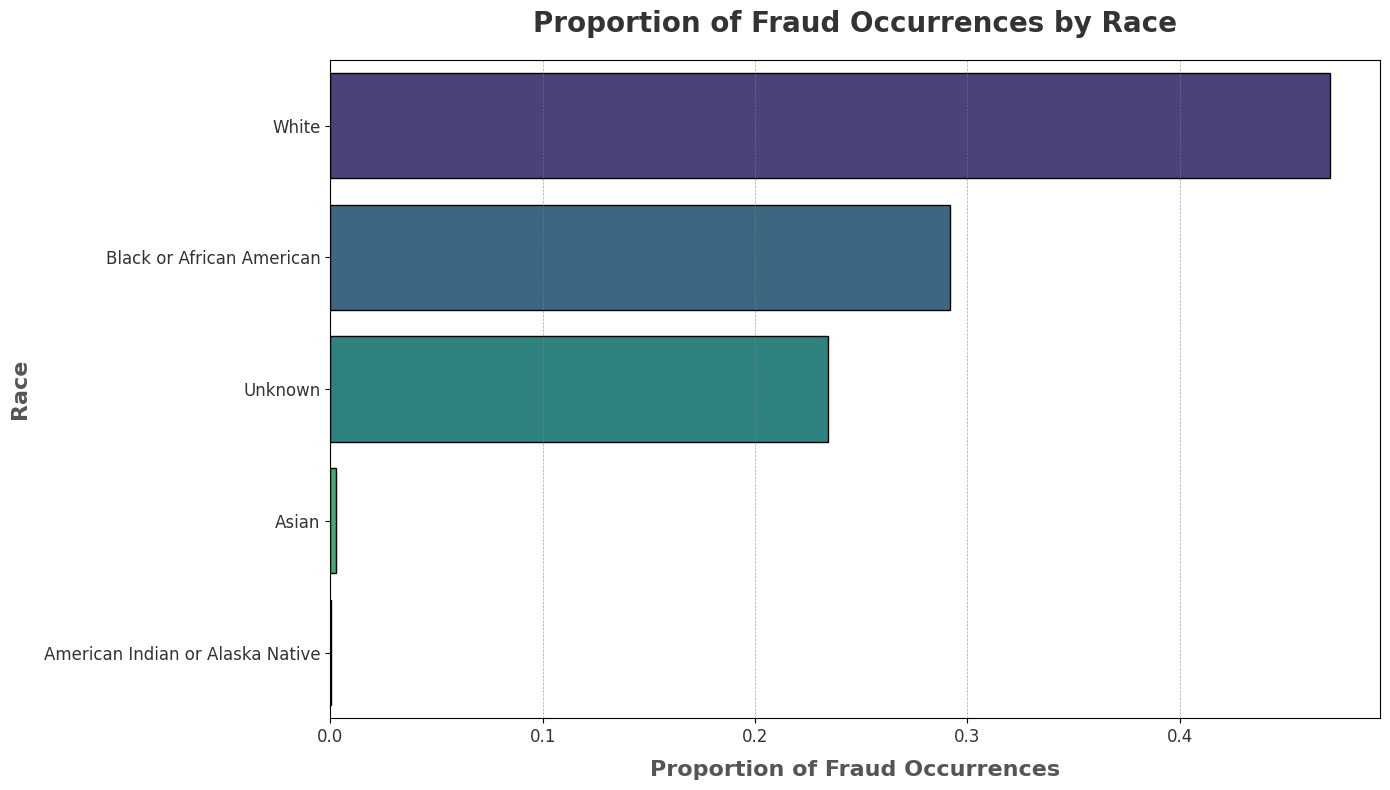

In [6]:
# Ensure data_cargo_fraud is your dataset and 'offender_race' is the correct column name
fraud_by_race = cargo_fraud['offender_race'].value_counts(normalize=True).sort_values(ascending=False)

# Enhanced Bar Chart for Fraud Occurrences by Race
plt.figure(figsize=(14, 8))
sns.barplot(
    x=fraud_by_race.values, 
    y=fraud_by_race.index, 
    palette="viridis", edgecolor="black"
)

plt.title("Proportion of Fraud Occurrences by Race", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Proportion of Fraud Occurrences", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Race", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#### Observed Pattern
Our analysis revealed a clear hierarchy in fraud occurrences across racial groups:
1. **White**: Highest number of reported cases
2. **Black or African American**: Second highest occurrence
3. **Unknown**: Third most frequent category
4. **Asian**: Fourth in frequency of reported cases
4. **American Indian or Alaska Native**: Fifth in frequency of reported cases

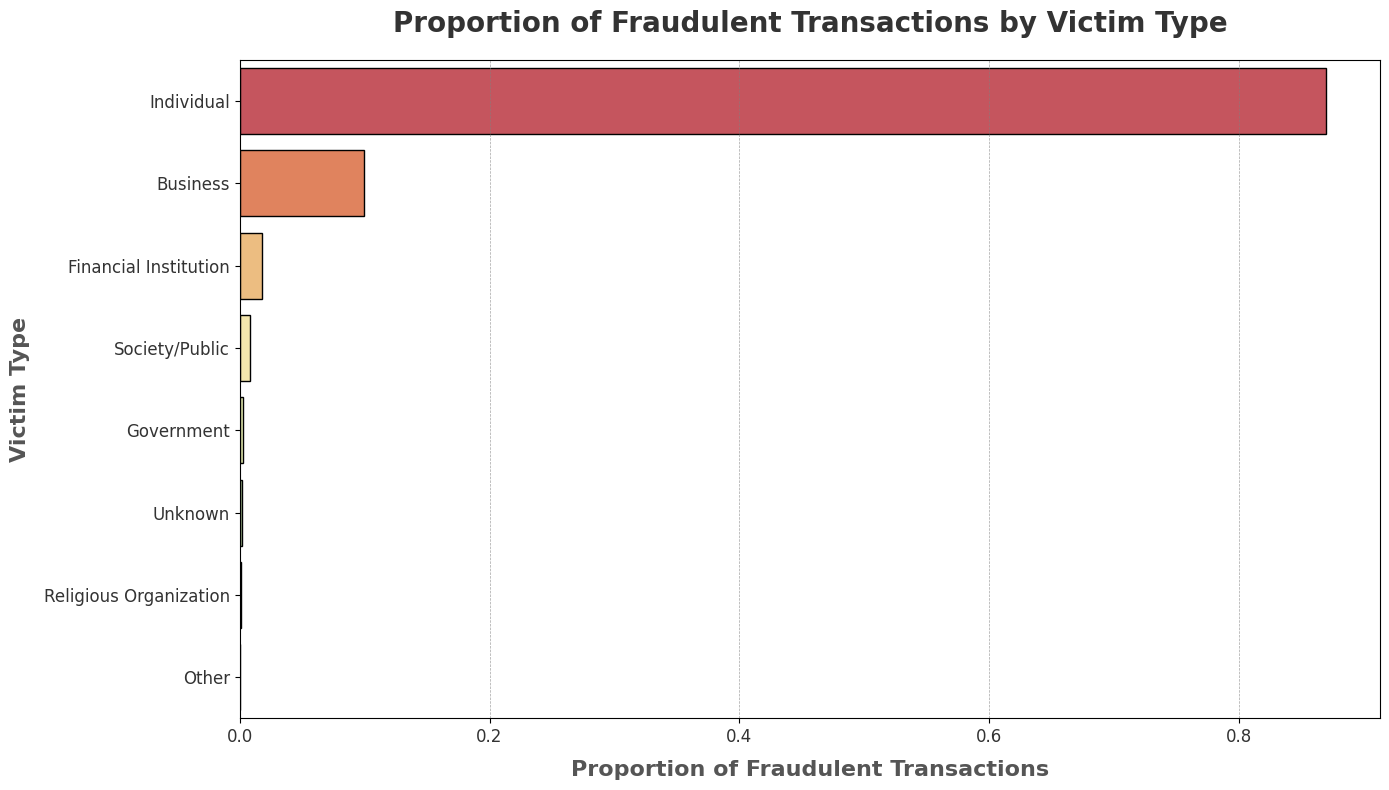

In [7]:
# Count the occurrences of fraud by victim type
fraud_by_type = cargo_fraud['victim_type_name'].value_counts(normalize=True).sort_values(ascending=False)

# Enhanced Bar Plot for Fraudulent Transactions by Victim Type
plt.figure(figsize=(14, 8))
sns.barplot(
    x=fraud_by_type.values, 
    y=fraud_by_type.index, 
    palette="Spectral", edgecolor="black"
)

plt.title("Proportion of Fraudulent Transactions by Victim Type", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Proportion of Fraudulent Transactions", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Victim Type", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#### Primary Finding
**Individual victims** represent the highest proportion of fraud cases, demonstrating a significant vulnerability in personal financial security.

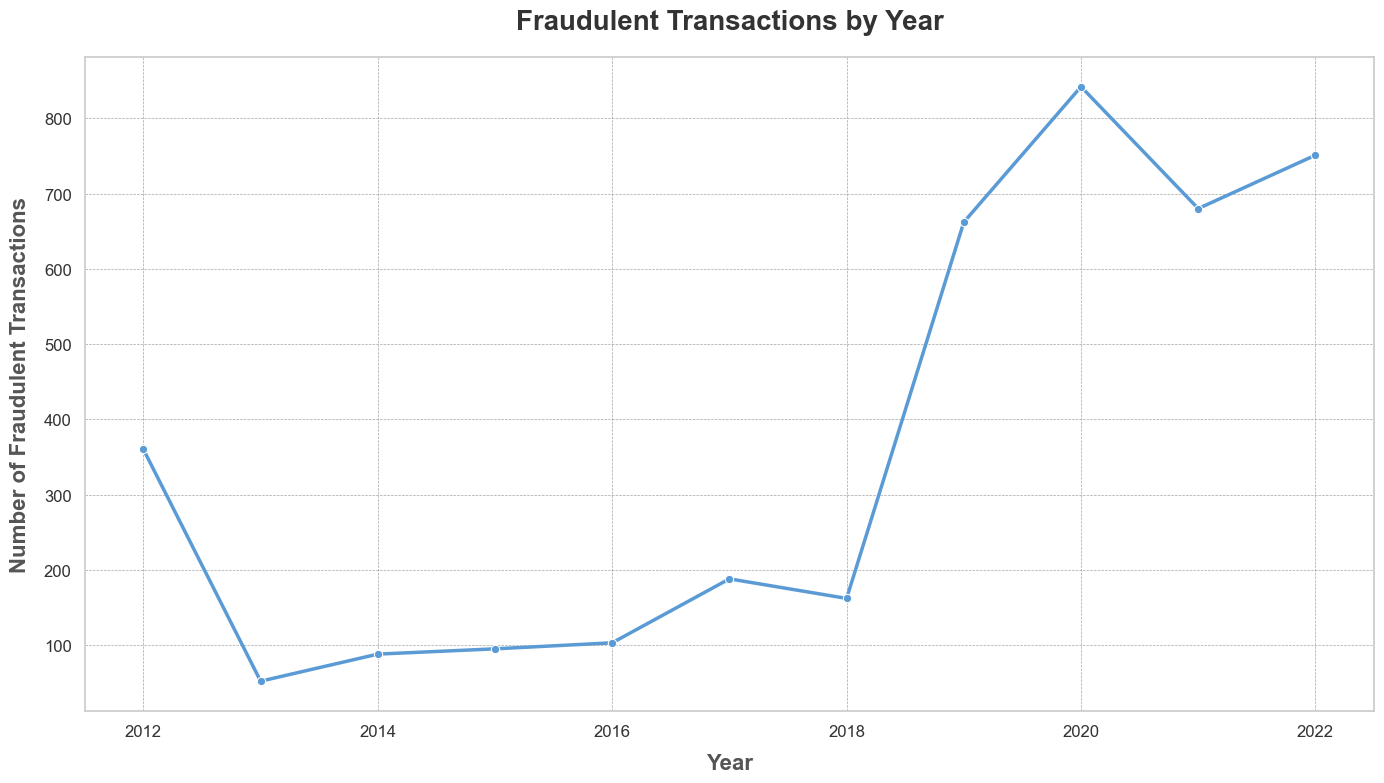

In [8]:
# Count the occurrences of fraud by year
fraud_by_year = cargo_fraud['data_year'].value_counts().sort_index()

# Enhanced Line Plot for Fraudulent Transactions Over Time
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")  # Clean theme
sns.lineplot(
    x=fraud_by_year.index, 
    y=fraud_by_year.values, 
    marker="o", color="#5A9BD5", linewidth=2.5
)

plt.title("Fraudulent Transactions by Year", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Year", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Number of Fraudulent Transactions", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

#### Temporal Analysis & COVID-19 Impact

#### Year-Over-Year Fraud Trends
Our temporal analysis revealed significant patterns in fraudulent transactions across years, with a **notable spike during 2020** coinciding with the COVID-19 pandemic. This observation led to deeper investigation of pandemic-related fraud patterns.

#### COVID-19 Impact Analysis
The pandemic period showed:
- **Increased fraud cases** during lockdown periods
- Shifts in fraud types and methodologies
- New vulnerabilities in financial systems
- Enhanced opportunities for fraudulent activities

#### Macroeconomic Integration
This discovery prompted us to incorporate broader economic indicators:

1. **Key Economic Metrics**
   - Unemployment rates
   - Housing Price Index (HPI)
   - Government stimulus impacts
   - Economic volatility measures

2. **Economic Correlation Study**
   - Relationship between fraud and economic downturns
   - Impact of financial assistance programs
   - Market volatility effects
   - Consumer behavior changes

In [9]:
# ==============================================
# 2. Define State Abbreviation Mapping
# ==============================================

# Mapping of state abbreviations to full state names in lowercase
state_abbrev_to_name = {
    'al': 'alabama', 'ak': 'alaska', 'az': 'arizona', 'ar': 'arkansas',
    'ca': 'california', 'co': 'colorado', 'ct': 'connecticut', 'de': 'delaware',
    'fl': 'florida', 'ga': 'georgia', 'hi': 'hawaii', 'id': 'idaho',
    'il': 'illinois', 'in': 'indiana', 'ia': 'iowa', 'ks': 'kansas',
    'ky': 'kentucky', 'la': 'louisiana', 'me': 'maine', 'md': 'maryland',
    'ma': 'massachusetts', 'mi': 'michigan', 'mn': 'minnesota', 'ms': 'mississippi',
    'mo': 'missouri', 'mt': 'montana', 'ne': 'nebraska', 'nv': 'nevada',
    'nh': 'new hampshire', 'nj': 'new jersey', 'nm': 'new mexico', 'ny': 'new york',
    'nc': 'north carolina', 'nd': 'north dakota', 'oh': 'ohio', 'ok': 'oklahoma',
    'or': 'oregon', 'pa': 'pennsylvania', 'ri': 'rhode island', 'sc': 'south carolina',
    'sd': 'south dakota', 'tn': 'tennessee', 'tx': 'texas', 'ut': 'utah',
    'vt': 'vermont', 'va': 'virginia', 'wa': 'washington', 'wv': 'west virginia',
    'wi': 'wisconsin', 'wy': 'wyoming', 'dc': 'district of columbia',
    'as': 'american samoa', 'gu': 'guam', 'mp': 'northern mariana islands',
    'pr': 'puerto rico', 'vi': 'virgin islands', 'us': 'united states'
}

# Define territories and non-continental states to exclude
exclude_states = [
    'puerto rico', 'guam', 'virgin islands', 'american samoa',
    'northern mariana islands', 'alaska', 'hawaii', 'united states'
]

exclude_states_lower = [state.lower() for state in exclude_states]


Next, we will focus on tidying up the fraud dataset to ensure it is clean, well-structured, and ready for further analysis. This step is crucial as it allows us to merge the fraud data with other datasets for subsequent correlation analysis and model building.

By organizing the data into a tidy format, we can streamline the process of integrating additional datasets, such as macroeconomic indicators or demographic information, to uncover deeper insights. This preparation will also ensure that the data is compatible with machine learning workflows, enabling us to build robust models for fraud detection and prediction.

In [10]:
# ==============================================
# 3. Load and Process Cargo Fraud Data
# ==============================================
# Load the cargo fraud data
cargo_fraud = pd.read_csv('cargo_fraud_only.csv')

# Check if 'data_year' column exists
if 'data_year' in cargo_fraud.columns:
    # Use 'data_year' as 'Year'
    cargo_fraud['Year'] = cargo_fraud['data_year'].astype(int)
else:
    # Extract 'Year' from 'date_recovered' or another date column
    cargo_fraud['date_recovered'] = pd.to_datetime(cargo_fraud['date_recovered'], errors='coerce')
    cargo_fraud['Year'] = cargo_fraud['date_recovered'].dt.year
    cargo_fraud = cargo_fraud.dropna(subset=['Year'])
    cargo_fraud['Year'] = cargo_fraud['Year'].astype(int)

# Ensure the 'State' column exists and matches the 'State' in other datasets
if 'state_name' in cargo_fraud.columns:
    cargo_fraud['State'] = cargo_fraud['state_name'].str.lower().str.strip()
elif 'state_abbr' in cargo_fraud.columns:
    # Map state abbreviations to full state names
    cargo_fraud['State'] = cargo_fraud['state_abbr'].str.lower().map(state_abbrev_to_name)
else:
    raise KeyError("No 'state_name' or 'state_abbr' column found in cargo_fraud DataFrame.")

# Exclude rows with missing 'State' or 'Year'
cargo_fraud = cargo_fraud.dropna(subset=['State', 'Year'])

# Exclude territories and non-continental states
cargo_fraud = cargo_fraud[~cargo_fraud['State'].isin(exclude_states_lower)]

# Display the processed cargo fraud data
print("\nProcessed Cargo Fraud Data:")
display(cargo_fraud[['State', 'Year']])

print(cargo_fraud.columns)



Processed Cargo Fraud Data:


,State,Year
0,florida,2012
1,florida,2012
2,florida,2012
3,florida,2012
4,florida,2012
...,...,...
193269,ohio,2022
193270,ohio,2022
193271,indiana,2022
193272,virginia,2022


Index(['data_year', 'ori', 'pub_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'county_name', 'region_name', 'population_group_code',
       'population_group_desc', 'offense_code', 'offense_name',
       'offender_race', 'offender_ethnicity', 'offender_age', 'offender_sex',
       'victim_type_code', 'victim_type_name', 'location_code',
       'location_name', 'weapon_code', 'weapon_name', 'prop_desc_code',
       'prop_desc_code.1', 'prop_desc_name', 'stolen_value', 'recovered_value',
       'recovered_flag', 'date_recovered', 'Year', 'State'],
      dtype='object')


#### House Price Index (HPI) Analysis

#### Data Source Overview
We incorporated the **House Price Index (HPI)** data from the Federal Housing Finance Agency (FHFA), which provides:
- Comprehensive single-family home value changes across all 50 states
- Seasonally adjusted, purchase-only data
- Regular quarterly and monthly updates

#### HPI Dataset Characteristics
The FHFA HPI offers several key features:
- **Comprehensive Coverage**: Measures changes in single-family home values nationwide
- **Data Quality**: Based on data from Fannie Mae and Freddie Mac
- **Regular Updates**: Quarterly comprehensive reports with state and city coverage

#### Analysis Purpose
Integration of HPI data enables investigation of:
- Housing market dynamics
- Mortgage default patterns
- Property value trends
- Market affordability shifts

#### Strategic Value
This dataset provides critical insights into:
1. **Market Indicators**
   - Housing affordability trends
   - Mortgage default risks
   - Prepayment behaviors

2. **Analytical Applications**
   - Correlation with fraud patterns
   - Macroeconomic relationship analysis
   - Predictive model development

#### Integration Benefits
The HPI data strengthens our analysis by:
- Providing reliable housing market metrics
- Enabling trend correlation studies
- Supporting predictive modeling efforts
- Offering historical market perspectives

In [11]:
# ==============================================
# 4. Load and Process HPI Data
# ==============================================

# Load HPI data
hpi_data_url = "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/hpi_by_state.csv"
hpi_data = pd.read_csv(hpi_data_url)

# Keep relevant columns
hpi_data = hpi_data[["State", "Year", "HPI"]]

# Filter years between 2012 and 2022
hpi_data = hpi_data[(hpi_data["Year"] >= 2012) & (hpi_data["Year"] <= 2022)].reset_index(drop=True)

# Standardize 'State' names
hpi_data['State'] = hpi_data['State'].str.lower().str.strip()

# Map state abbreviations to full names if necessary
if hpi_data['State'].str.len().max() == 2:
    hpi_data['State'] = hpi_data['State'].map(state_abbrev_to_name)

# Exclude territories and non-continental states
hpi_data = hpi_data[~hpi_data['State'].isin(exclude_states_lower)]

# Convert 'Year' to integer
hpi_data['Year'] = hpi_data['Year'].astype(int)

# Display the first few rows
print("\nProcessed HPI Data:")
display(hpi_data)



Processed HPI Data:


,State,Year,HPI
0,alabama,2012,341.58
1,alabama,2013,339.66
2,alabama,2014,344.12
3,alabama,2015,352.11
4,alabama,2016,361.39
...,...,...,...
556,wyoming,2018,582.12
557,wyoming,2019,607.60
558,wyoming,2020,630.87
559,wyoming,2021,690.41


#### HPI Trend Visualization Analysis

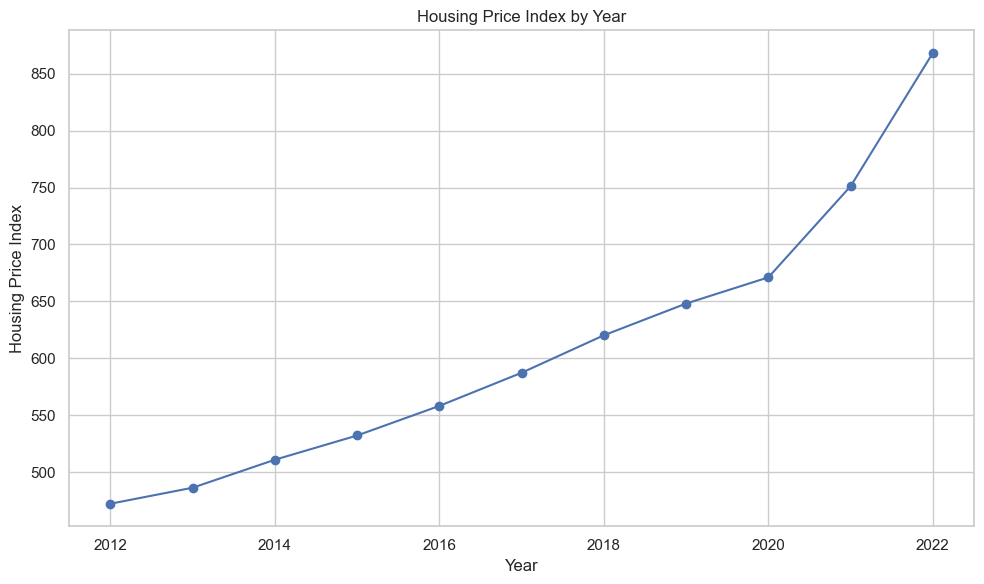

In [12]:
# Group the HPI data by year
hpi_by_year = hpi_data.groupby("Year").agg(HPI=('HPI', 'mean')
).reset_index()

# Plot HPI over time
plt.figure(figsize=(10, 6))
plt.plot(hpi_by_year.Year, hpi_by_year.HPI, marker='o', linestyle='-')
plt.title('Housing Price Index by Year')
plt.xlabel('Year')
plt.ylabel('Housing Price Index')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Visualization Overview
We developed a comprehensive plot to analyze the **mean House Price Index (HPI)** over time, revealing:
- Clear upward trajectory in housing prices
- Year-over-year price evolution patterns
- Long-term market trends

#### Key Observations
The visualization highlighted several important trends:
- **Consistent Price Appreciation**: Demonstrated steady increase in HPI values 
- **Market Dynamics**: Showed periods of accelerated and decelerated growth
- **Historical Context**: Provided perspective on long-term market evolution


#### State-Level HPI Analysis (2012-2022)

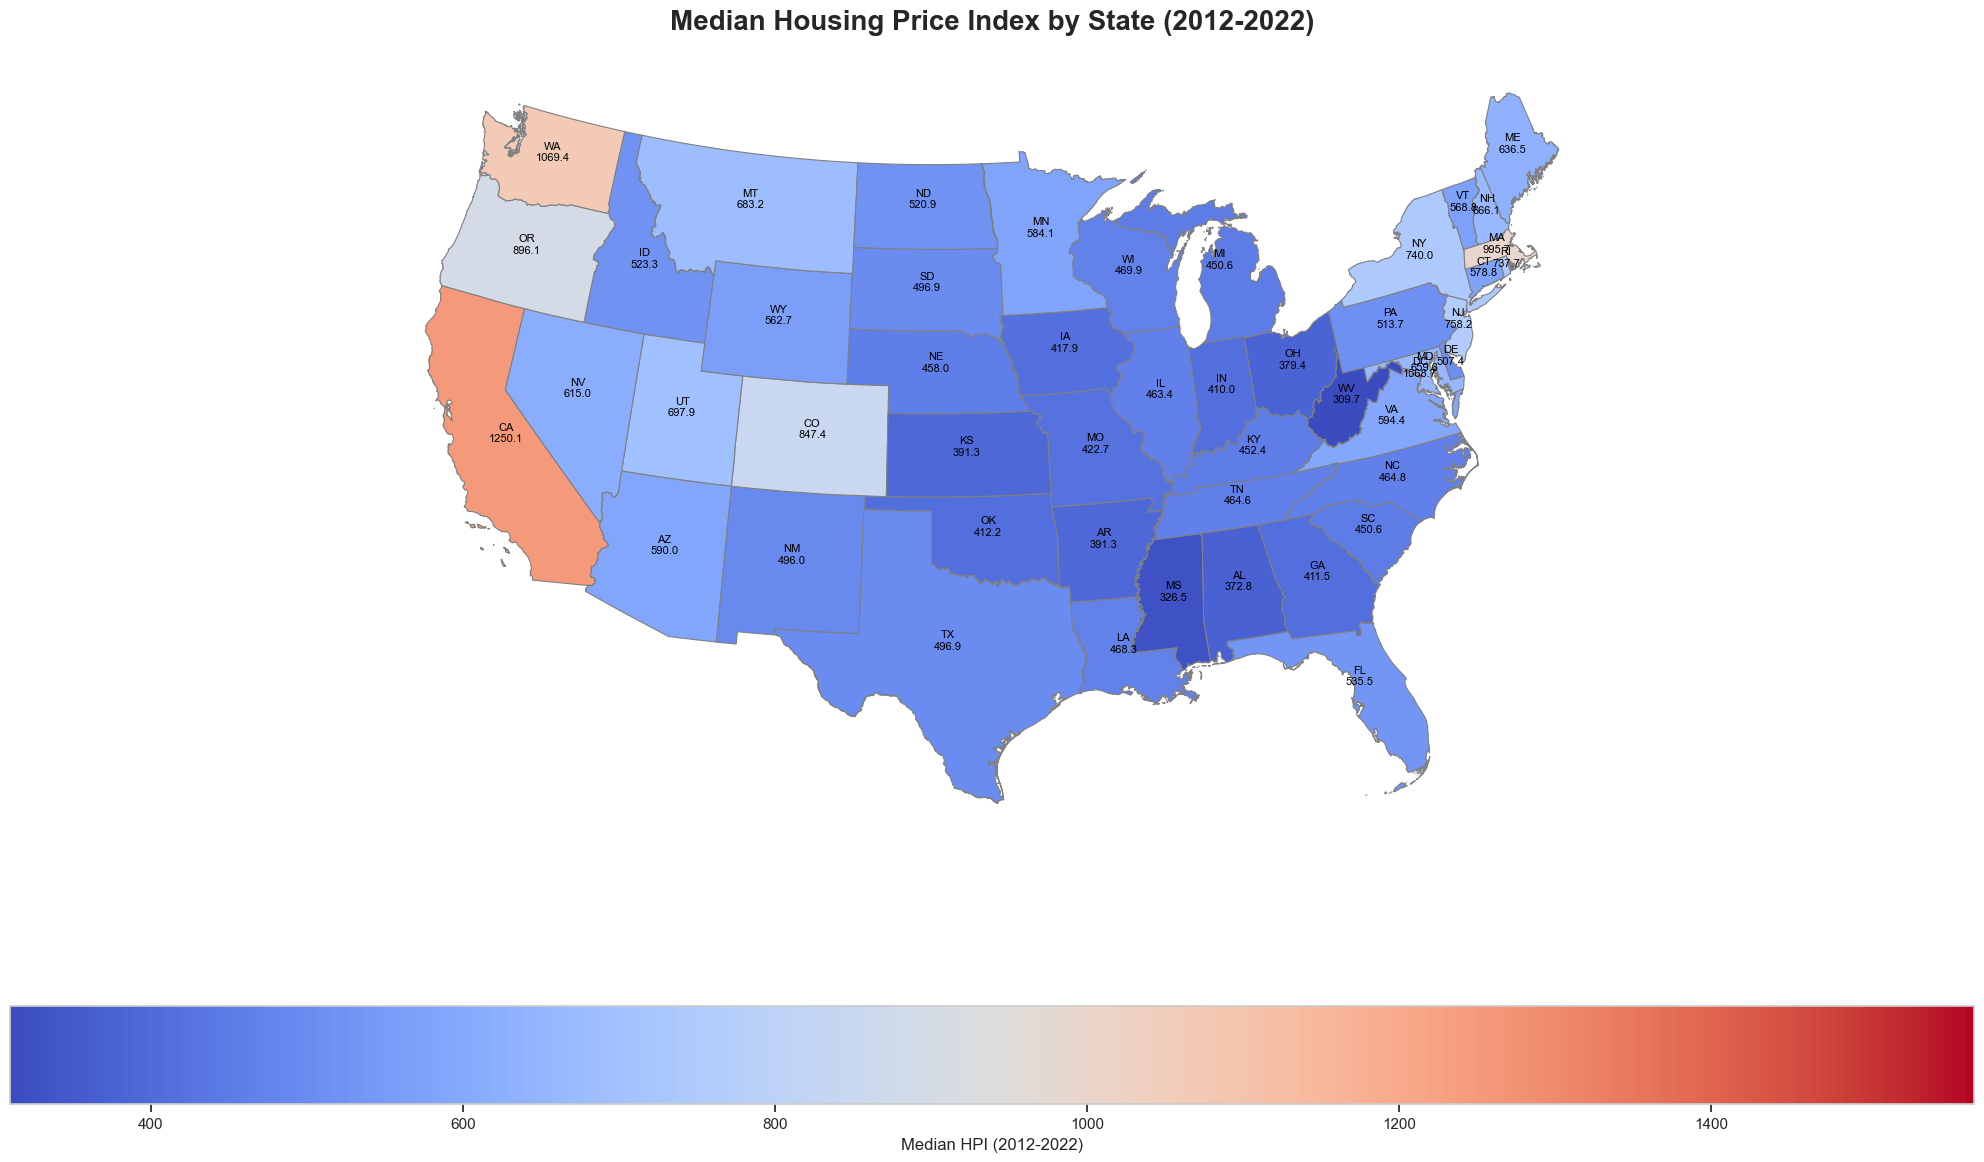

In [13]:
hpi_by_state = hpi_data.groupby("State").agg(HPI=('HPI', 'median')
).reset_index()

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')
usa['NAME_lower'] = usa['NAME'].str.lower()

# merge the geopandas file and unemployment data
merged = usa.merge(hpi_by_state, how='left', left_on='NAME_lower', right_on='State')

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# Enhanced HPI Map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='HPI', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.5',
              legend=True, legend_kwds={'label': "Median HPI (2012-2022)", 'orientation': "horizontal"})
for idx, row in visframe.iterrows():
    ax.annotate(text=f"{row['STUSPS']}\n{row['HPI']:.1f}", xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=8, color='black')
ax.set_title('Median Housing Price Index by State (2012-2022)', fontsize=20, pad=20, weight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()

#### Key Findings
Our decade-long analysis of median House Price Index (HPI) revealed:
- **California**: Highest median HPI across all states [[8]]
- **Significant Geographic Variation**: Large disparities in housing prices nationwide
- **Regional Patterns**: Distinct clustering of high and low HPI areas

#### Poverty Dataset Analysis

#### Data Source Overview
We incorporated comprehensive poverty data from the U.S. Census Bureau, which includes:
- State-level poverty counts
- Poverty rate calculations
- Total population statistics
- Economic condition indicators

In [14]:
# ==============================================
# 5. Load and Process Poverty Data
# ==============================================

# Load poverty data
poverty_data = pd.read_csv('poverty_data.csv')  # Replace with the actual file path

# Reshape poverty data to long format
id_vars = ['State']
value_vars = [col for col in poverty_data.columns if col != 'State']

poverty_long = pd.melt(poverty_data, id_vars=id_vars, value_vars=value_vars,
                       var_name='Variable', value_name='Value')

# Extract 'Year' from the 'Variable' column
poverty_long['Year'] = poverty_long['Variable'].str.extract('(\d{4})', expand=False).astype(int)
poverty_long['Variable_Name'] = poverty_long['Variable'].str.replace(' \d{4}', '', regex=True).str.strip()

# Pivot the data to have one row per 'State' and 'Year'
poverty_pivot = poverty_long.pivot_table(index=['State', 'Year'], columns='Variable_Name', values='Value', aggfunc='first').reset_index()
poverty_pivot.columns.name = None

# Standardize 'State' names
poverty_pivot['State'] = poverty_pivot['State'].str.lower().str.strip()

# Convert numeric columns to float
numeric_cols = ['Total population', 'Number in poverty', 'Percentage poverty']
for col in numeric_cols:
    poverty_pivot[col] = poverty_pivot[col].astype(str).replace('nan', '').str.replace(',', '').str.replace('%', '')
    poverty_pivot[col] = poverty_pivot[col].replace('', pd.NA)
    poverty_pivot[col] = poverty_pivot[col].astype(float)

# Rename columns for clarity
poverty_pivot.rename(columns={
    'Total population': 'Total_Population',
    'Number in poverty': 'Number_in_Poverty',
    'Percentage poverty': 'Poverty_Rate'
}, inplace=True)

# Exclude territories and non-continental states
poverty_pivot = poverty_pivot[~poverty_pivot['State'].isin(exclude_states_lower)]

# Display the first few rows
print("\nProcessed Poverty Data:")
display(poverty_pivot)


Processed Poverty Data:


,State,Year,Number_in_Poverty,Poverty_Rate,Total_Population
0,alabama,2012,777.0,16.2,4808.0
1,alabama,2013,891.0,18.5,4807.0
2,alabama,2014,848.0,17.8,4765.0
3,alabama,2015,784.0,16.3,4820.0
4,alabama,2016,782.0,16.2,4821.0
...,...,...,...,...,...
556,wyoming,2018,53.0,9.4,565.0
557,wyoming,2019,52.0,9.2,565.0
558,wyoming,2020,55.0,9.8,561.0
559,wyoming,2021,53.0,9.3,568.0


#### State Poverty Rate Analysis (2007-2022)

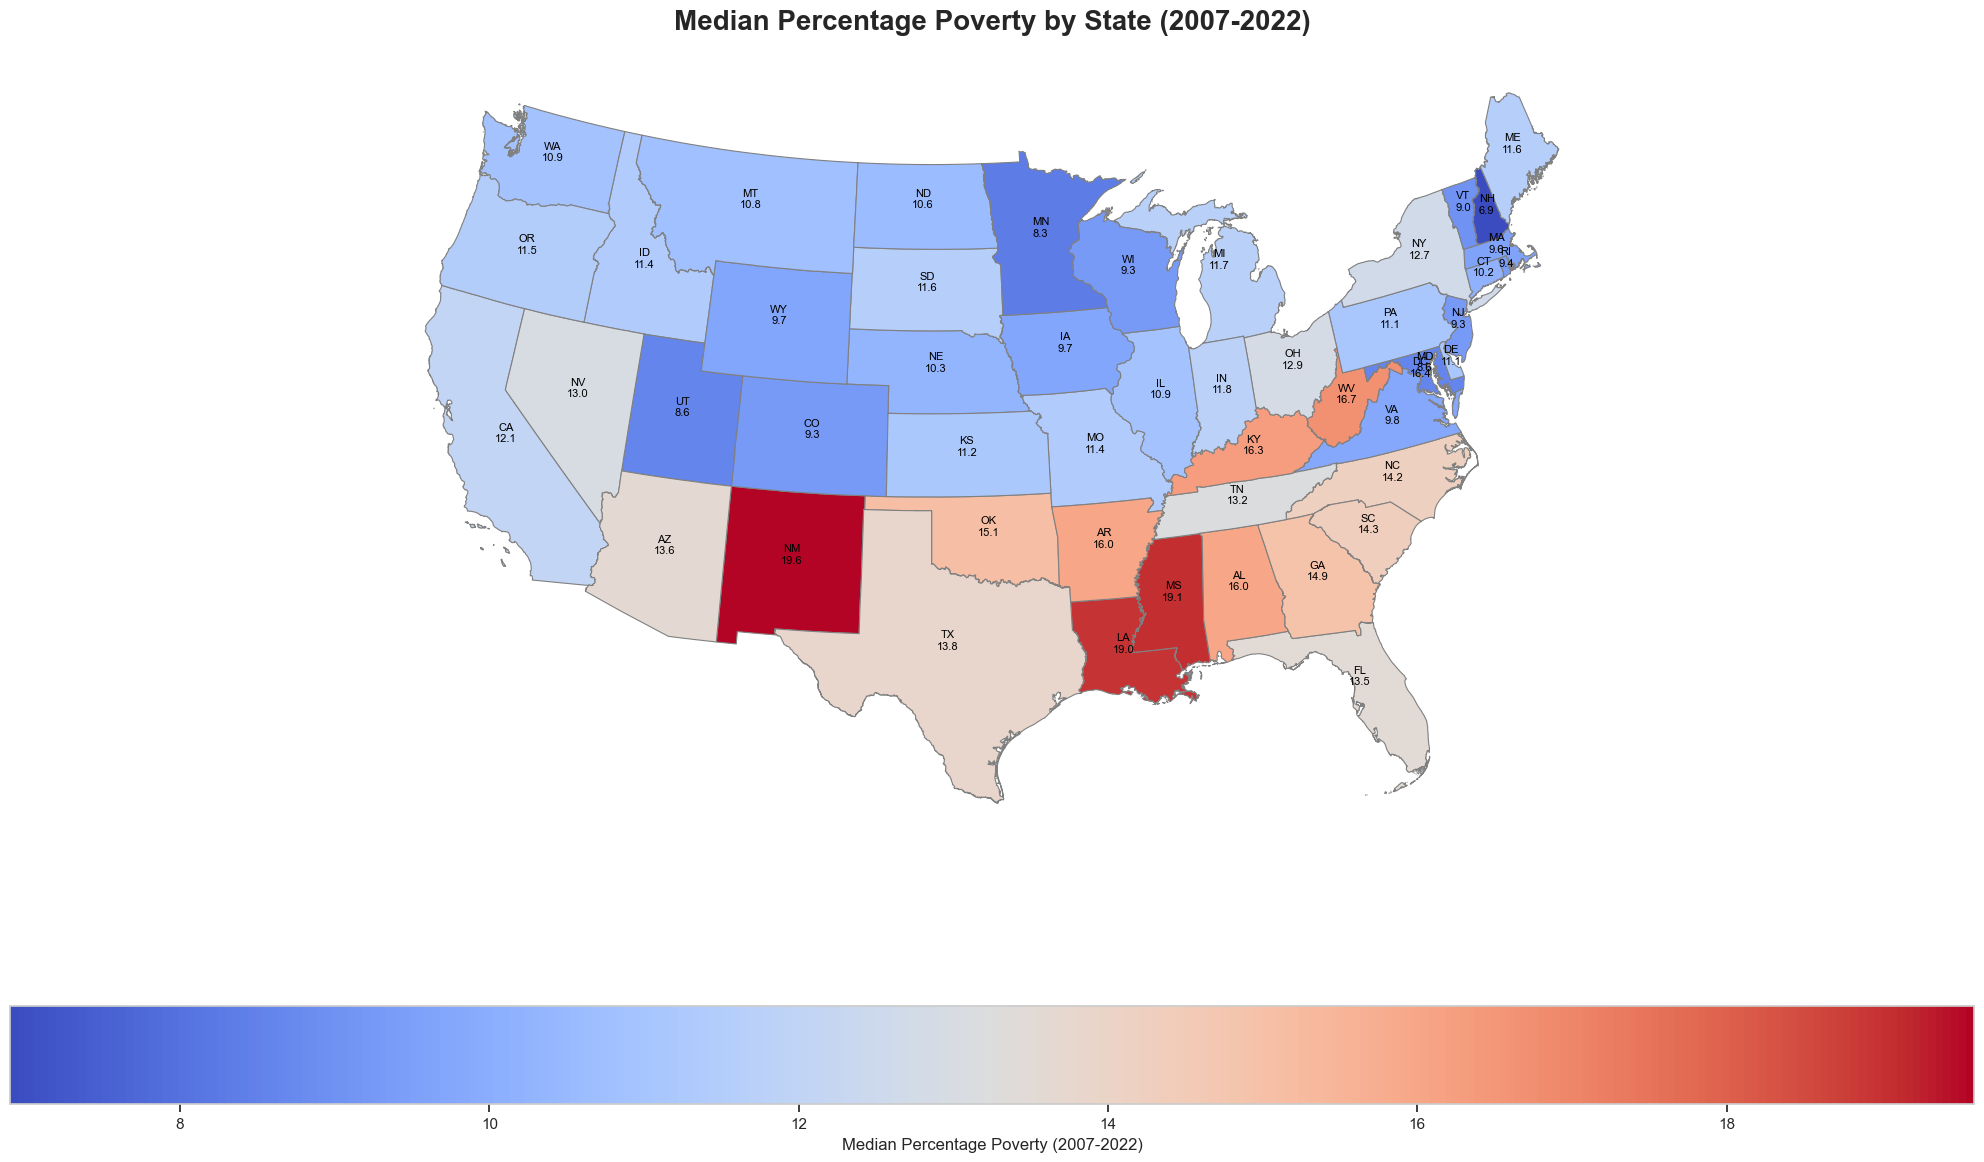

In [15]:
df_poverty_by_state = poverty_pivot.groupby("State").agg(percentage_poverty=('Poverty_Rate', 'median')
).reset_index()

# Retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')
usa['NAME_lower'] = usa['NAME'].str.lower()

# Merge the geopandas file and unemployment data
merged = usa.merge(df_poverty_by_state, how='left', left_on='NAME_lower', right_on='State')

# Exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI', 'GU', 'MP', 'PR', 'VI'])]

# Reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# Enhanced Poverty Map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='percentage_poverty', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.5',
              legend=True, legend_kwds={'label': "Median Percentage Poverty (2007-2022)", 'orientation': "horizontal"})
for idx, row in visframe.iterrows():
    ax.annotate(text=f"{row['STUSPS']}\n{row['percentage_poverty']:.1f}", xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=8, color='black')
ax.set_title('Median Percentage Poverty by State (2007-2022)', fontsize=20, pad=20, weight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()


#### Key Findings
Our long-term analysis of state poverty rates revealed:
- **New Mexico**: Highest median poverty percentage across all states [[3]]
- **Significant Variations**: Notable differences in poverty rates between states
- **Extended Timeline**: 15-year analysis period providing comprehensive trends

#### Homelessness Data Analysis

#### Data Source Overview
We analyzed homelessness data from the Office of Policy Development and Research, examining:
- Annual change in state homelessness rates
- Temporal trends and patterns
- State-by-state comparisons

In [16]:
# ==============================================
# 6. Load and Process Homelessness Data
# ==============================================

# Load homelessness data
homelessness_data_url = "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/homeless_data.csv"
homelessness_data = pd.read_csv(homelessness_data_url)

# Map state abbreviations to full state names
homelessness_data['State'] = homelessness_data['State'].str.lower().map(state_abbrev_to_name)

# Exclude rows with missing 'State'
homelessness_data = homelessness_data.dropna(subset=['State'])

# Exclude territories and non-continental states
homelessness_data = homelessness_data[~homelessness_data['State'].isin(exclude_states_lower)]

# Rename columns for years (Assuming columns have year information)
new_column_names = {
    col: col.split(', ')[-1].split('-')[0] for col in homelessness_data.columns if 'Change in Total Homelessness' in col
}
homelessness_data.rename(columns=new_column_names, inplace=True)

# Melt the DataFrame to long format
df_homelessness = pd.melt(homelessness_data, id_vars=['State'], var_name='Year', value_name='homeless_rate_change')

# Clean 'homeless_rate_change' column
df_homelessness['homeless_rate_change'] = df_homelessness['homeless_rate_change'].replace(' ', np.nan)
df_homelessness = df_homelessness.dropna(subset=['homeless_rate_change'])
df_homelessness['homeless_rate_change'] = df_homelessness['homeless_rate_change'].str.replace('%', '').astype(float)
df_homelessness['Year'] = df_homelessness['Year'].astype(int)

# Display the first few rows
print("\nProcessed Homelessness Data:")
display(df_homelessness)


Processed Homelessness Data:


,State,Year,homeless_rate_change
0,alabama,2022,-11.9
1,arkansas,2022,6.1
2,arizona,2022,5.0
3,california,2022,5.8
4,colorado,2022,38.9
...,...,...,...
779,vermont,2007,218.4
780,washington,2007,19.9
781,wisconsin,2007,-13.9
782,west virginia,2007,-41.2


#### State Homelessness Trends Analysis (2007-2022)

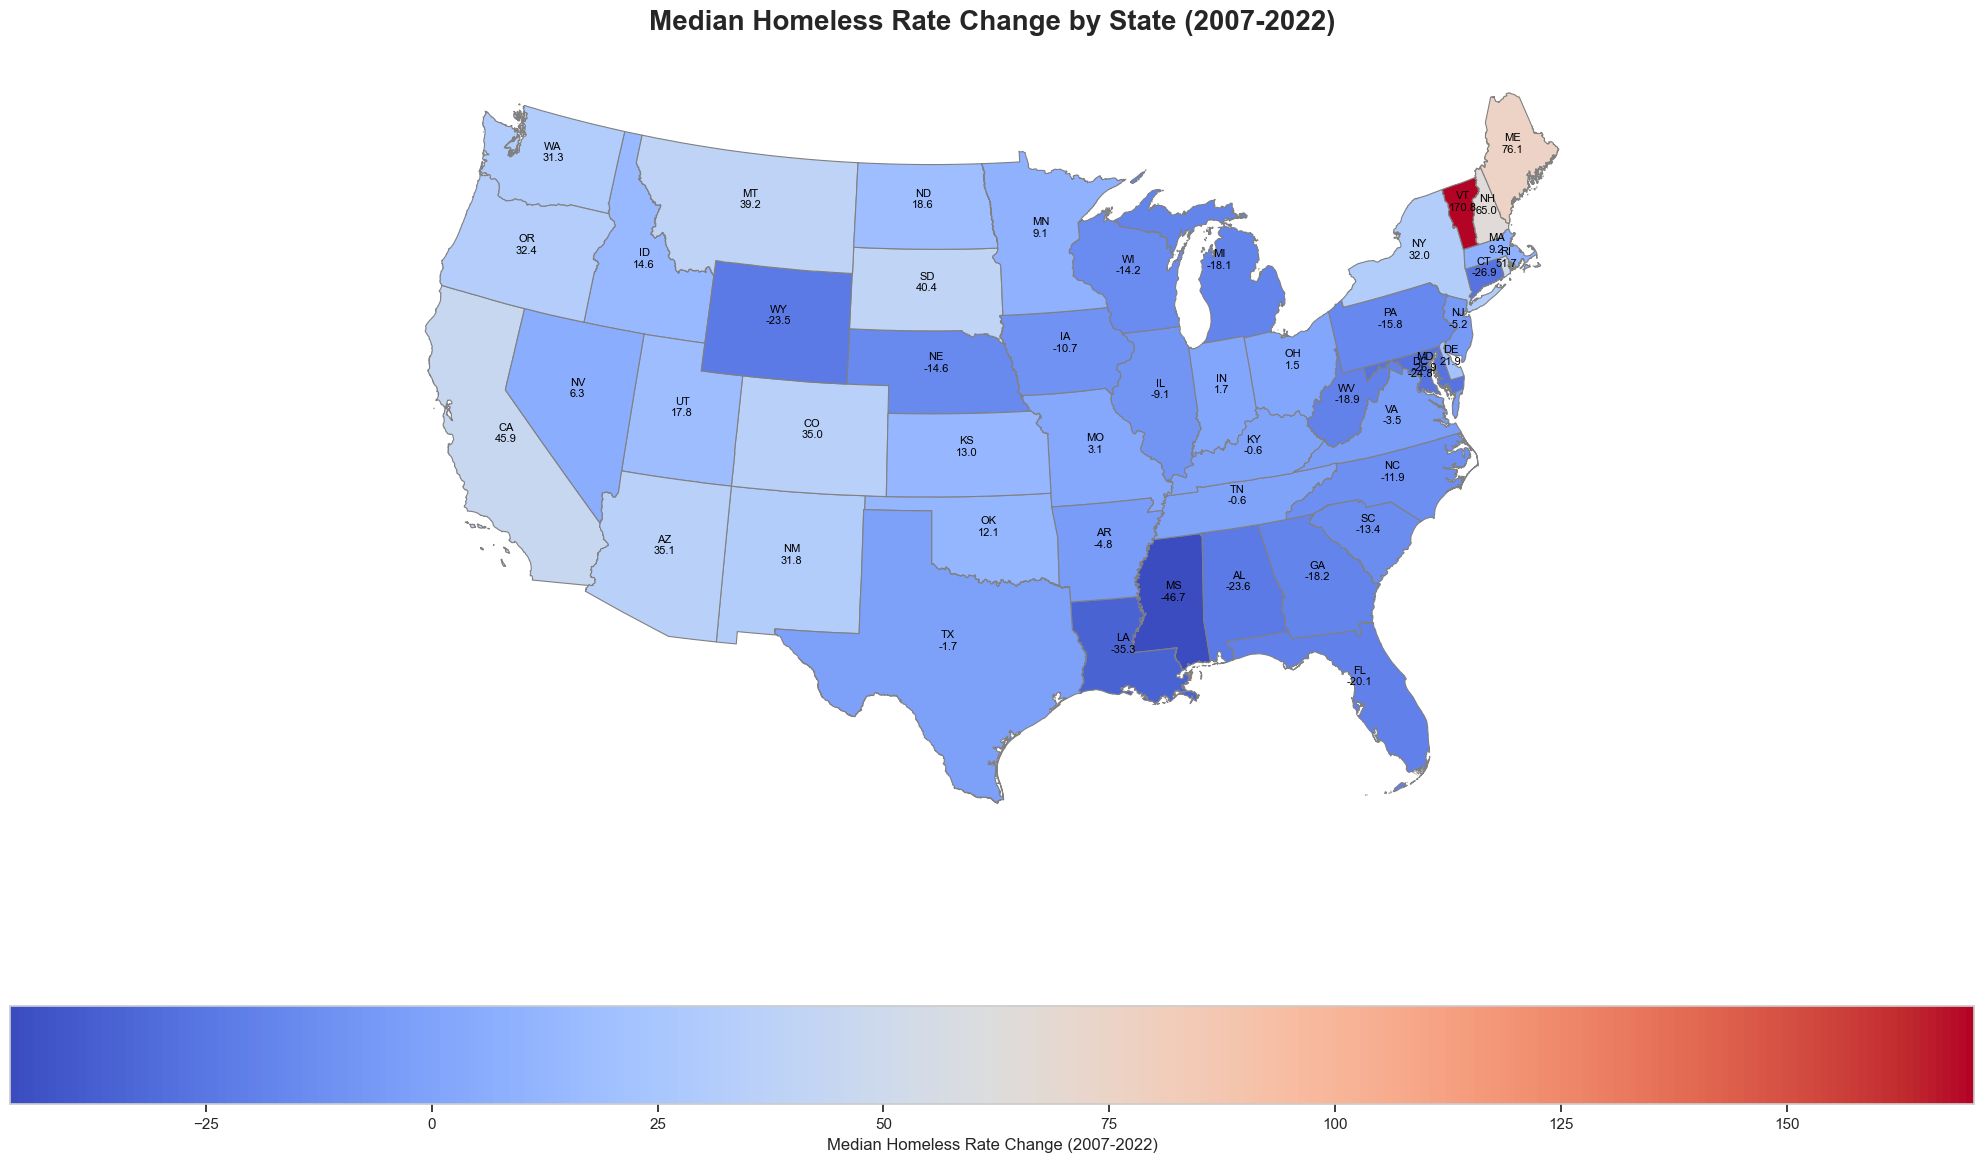

In [17]:
df_homelessness_by_state = df_homelessness.groupby("State").agg(homeless_rate_change=('homeless_rate_change', 'median')
).reset_index()

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')
usa['NAME_lower'] = usa['NAME'].str.lower()

# merge the geopandas file and unemployment data
merged = usa.merge(df_homelessness_by_state, how='left', left_on='NAME_lower', right_on='State')

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI', 'GU', 'MP', 'PR', 'VI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# Enhanced HPI Map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='homeless_rate_change', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.5',
              legend=True, legend_kwds={'label': "Median Homeless Rate Change (2007-2022)", 'orientation': "horizontal"})
for idx, row in visframe.iterrows():
    ax.annotate(text=f"{row['STUSPS']}\n{row['homeless_rate_change']:.1f}", xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=8, color='black')
ax.set_title('Median Homeless Rate Change by State (2007-2022)', fontsize=20, pad=20, weight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()

#### Key Findings
Our longitudinal analysis revealed:
- **Vermont**: Experienced the most significant increase in homelessness rates
- **National Context**: Part of broader trends showing concerning growth patterns [[1]]
- **Timeline**: Comprehensive 15-year analysis period

In [18]:
# ==============================================
# 7. Load and Process Education Data
# ==============================================

# Load education data
education_data = pd.read_csv('education.csv')  # Replace with the actual file path

# Display the first few rows to verify the structure
print("\nInitial Education Data:")
display(education_data)

# Identify columns related to education metrics for years 2012-2022
education_cols = [col for col in education_data.columns if any(str(year) in col for year in range(2012, 2023))]

# Keep 'State' and the identified education columns
education_data = education_data[['State'] + education_cols]

# Melt the data to long format
education_long = pd.melt(
    education_data,
    id_vars=['State'],
    value_vars=education_cols,
    var_name='Variable',
    value_name='Value'
)

# Extract 'Year' and 'Education_Variable' from the 'Variable' column
education_long['Year'] = education_long['Variable'].str.extract('(\d{4})', expand=False).astype(int)
education_long['Education_Variable'] = education_long['Variable'].str.replace(' \d{4}', '', regex=True).str.strip()

# Drop rows where 'Year' is NaN
education_long = education_long.dropna(subset=['Year'])

# Pivot the data to have one row per 'State' and 'Year'
education_pivot = education_long.pivot_table(
    index=['State', 'Year'],
    columns='Education_Variable',
    values='Value',
    aggfunc='first'
).reset_index()

# Flatten the columns
education_pivot.columns.name = None

# Standardize 'State' names
education_pivot['State'] = education_pivot['State'].str.lower().str.strip()

# Map state abbreviations to full state names if necessary
if education_pivot['State'].str.len().max() == 2:
    education_pivot['State'] = education_pivot['State'].map(state_abbrev_to_name)

# Exclude territories and non-continental states
education_pivot = education_pivot[~education_pivot['State'].isin(exclude_states_lower)]

# Convert numeric columns to float
numeric_cols = [col for col in education_pivot.columns if col not in ['State', 'Year']]
for col in numeric_cols:
    # Convert to string and remove commas and percent signs
    education_pivot[col] = education_pivot[col].astype(str).str.replace(',', '').str.replace('%', '')
    # Convert to numeric, coercing errors to NaN
    education_pivot[col] = pd.to_numeric(education_pivot[col], errors='coerce')

# Rename columns for clarity (Adjust based on actual column names)
# Example:
# education_pivot.rename(columns={
#     "Percentage with Bachelor's Degree": 'Bachelor_Degree_Rate'
# }, inplace=True)

# Exclude rows with missing 'State' or 'Year' after mapping
education_pivot = education_pivot.dropna(subset=['State', 'Year'])

# Display the first few rows of the processed education data
print("\nProcessed Education Data (2012-2022):")
display(education_pivot)



Initial Education Data:


,FIPS Code,State,Area name,2003 Urban Influence Code,2013 Urban Influence Code,2013 Rural-urban Continuum Code,2023 Rural-urban Continuum Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2018-22","High school diploma only, 2018-22","Some college or associate's degree, 2018-22","Bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22","Percent of adults with a bachelor's degree or higher, 2018-22"
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,29.0,28.5,"24,599,698","59,741,825","64,508,122","77,751,347",10.9,26.4,28.5,34.3
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,29.0,22.3,"421,180","1,041,725","1,032,770","932,845",12.3,30.4,30.1,27.2
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,29.6,21.7,"3,857","12,517","11,935","11,879",9.6,31.1,29.7,29.6
3,1003,AL,Baldwin County,5.0,2.0,3.0,3.0,"18,726","8,426","2,334",...,31.8,27.7,"14,031","46,391","52,215","54,385",8.4,27.8,31.3,32.6
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,25.8,14.5,"4,155","6,507","4,913","2,100",23.5,36.8,27.8,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,72145,PR,Vega Baja Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,24.0,17.6,"9,267","11,653","8,932","10,001",23.3,29.2,22.4,25.1
3290,72147,PR,Vieques Municipio,12.0,12.0,7.0,6.0,NaN,NaN,NaN,...,15.9,10.1,"1,668","2,793",681,875,27.7,46.4,11.3,14.5
3291,72149,PR,Villalba Municipio,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,14.3,15.2,"3,274","5,344","3,555","3,358",21.1,34.4,22.9,21.6
3292,72151,PR,Yabucoa Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,20.0,12.9,"5,674","5,824","6,852","4,147",25.2,25.9,30.5,18.4



Processed Education Data (2012-2022):


,State,Year,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Bachelor's degree or higher,-22","High school diploma only,-22","Less than a high school diploma,-22","Percent of adults completing some college or associate's degree,-22","Percent of adults with a bachelor's degree or higher,-22","Percent of adults with a high school diploma only,-22","Percent of adults with less than a high school diploma,-22","Some college or associate's degree,-22"
2,alabama,2013,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,alabama,2018,NaN,NaN,932845.0,1041725.0,421180.0,30.1,27.2,30.4,12.3,1032770.0
4,arkansas,2013,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,arkansas,2018,NaN,NaN,501979.0,693875.0,239655.0,29.3,24.7,34.1,11.8,596338.0
6,arizona,2013,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100,wisconsin,2018,NaN,NaN,1296273.0,1211254.0,279405.0,31.1,32.0,29.9,6.9,1260899.0
101,west virginia,2013,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,west virginia,2018,NaN,NaN,288779.0,502333.0,147001.0,26.2,22.7,39.5,11.6,333416.0
103,wyoming,2013,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# ==============================================
# 8. Load and Process Unemployment Data
# ==============================================

# Load the unemployment data
unemployment_data = pd.read_csv('Unemployment.csv')  # Replace with the actual file path

# Identify columns that contain 'Unemployment_rate'
unemployment_rate_cols = [col for col in unemployment_data.columns if 'Unemployment_rate' in col]

# Melt the DataFrame to long format
unemployment_long = pd.melt(
    unemployment_data,
    id_vars=['State', 'Area_Name'],
    value_vars=unemployment_rate_cols,
    var_name='Year',
    value_name='Unemployment_Rate'
)

# Extract the year from the 'Year' column
unemployment_long['Year'] = unemployment_long['Year'].str.extract('Unemployment_rate_(\d+)', expand=False).astype(int)

# Convert 'Unemployment_Rate' to numeric
unemployment_long['Unemployment_Rate'] = pd.to_numeric(unemployment_long['Unemployment_Rate'], errors='coerce')

# Standardize 'State' names
unemployment_long['State'] = unemployment_long['State'].str.lower().str.strip()

# Map state abbreviations to full state names if necessary
if unemployment_long['State'].str.len().max() == 2:
    unemployment_long['State'] = unemployment_long['State'].map(state_abbrev_to_name)

# Exclude territories and non-continental states
unemployment_long = unemployment_long[~unemployment_long['State'].isin(exclude_states_lower)]

# Aggregate at the state level by taking the mean unemployment rate for each state and year
state_unemployment = unemployment_long.groupby(['State', 'Year'])['Unemployment_Rate'].mean().reset_index()

# Display the processed unemployment data
print("\nProcessed Unemployment Data:")
print(state_unemployment.head())



Processed Unemployment Data:
     State  Year  Unemployment_Rate
0  alabama  2000           5.557353
1  alabama  2001           6.314706
2  alabama  2002           7.030882
3  alabama  2003           7.017647
4  alabama  2004           6.536765


In [20]:
# ==============================================
# 9. Merge All Datasets
# ==============================================

# Aggregate the number of fraud cases per state and year
fraud_counts = cargo_fraud.groupby(['State', 'Year']).size().reset_index(name='Fraud_Count')

# Ensure 'State' and 'Year' are of appropriate types
fraud_counts['State'] = fraud_counts['State'].str.lower().str.strip()
fraud_counts['Year'] = fraud_counts['Year'].astype(int)

# Define a function to prepare dataframes for merging
def prepare_dataframe(df, state_col='State', year_col='Year'):
    df[state_col] = df[state_col].str.lower().str.strip()
    df[year_col] = df[year_col].astype(int)
    return df

# Prepare all datasets
fraud_counts = prepare_dataframe(fraud_counts)
poverty_pivot = prepare_dataframe(poverty_pivot)
education_pivot = prepare_dataframe(education_pivot)
hpi_data = prepare_dataframe(hpi_data)
state_unemployment = prepare_dataframe(state_unemployment)

# Merge fraud_counts with poverty_pivot
merged_data = pd.merge(fraud_counts, poverty_pivot, on=['State', 'Year'], how='left')
print("\nAfter merging with poverty_pivot:", merged_data.shape)
display(merged_data)

# Merge with education_pivot
merged_data = pd.merge(merged_data, education_pivot, on=['State', 'Year'], how='left')
print("After merging with education_pivot:", merged_data.shape)
display(merged_data)

# Merge with hpi_data
merged_data = pd.merge(merged_data, hpi_data, on=['State', 'Year'], how='left')
print("After merging with hpi_data:", merged_data.shape)
display(merged_data)

# Merge with state_unemployment
merged_data = pd.merge(merged_data, state_unemployment, on=['State', 'Year'], how='left')
print("After merging with state_unemployment:", merged_data.shape)
display(merged_data)


After merging with poverty_pivot: (338, 6)


,State,Year,Fraud_Count,Number_in_Poverty,Poverty_Rate,Total_Population
0,alabama,2017,16,735.0,15.3,4801.0
1,alabama,2018,15,779.0,16.0,4877.0
2,alabama,2019,42,627.0,12.9,4873.0
3,alabama,2020,140,744.0,14.9,5001.0
4,alabama,2021,1806,787.0,15.9,4961.0
...,...,...,...,...,...,...
333,wisconsin,2021,218,551.0,9.3,5910.0
334,wisconsin,2022,135,386.0,6.6,5807.0
335,wyoming,2020,1,55.0,9.8,561.0
336,wyoming,2021,2,53.0,9.3,568.0


After merging with education_pivot: (338, 16)


,State,Year,Fraud_Count,Number_in_Poverty,Poverty_Rate,Total_Population,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Bachelor's degree or higher,-22","High school diploma only,-22","Less than a high school diploma,-22","Percent of adults completing some college or associate's degree,-22","Percent of adults with a bachelor's degree or higher,-22","Percent of adults with a high school diploma only,-22","Percent of adults with less than a high school diploma,-22","Some college or associate's degree,-22"
0,alabama,2017,16,735.0,15.3,4801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,alabama,2018,15,779.0,16.0,4877.0,NaN,NaN,932845.0,1041725.0,421180.0,30.1,27.2,30.4,12.3,1032770.0
2,alabama,2019,42,627.0,12.9,4873.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,alabama,2020,140,744.0,14.9,5001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,alabama,2021,1806,787.0,15.9,4961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,wisconsin,2021,218,551.0,9.3,5910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,wisconsin,2022,135,386.0,6.6,5807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,wyoming,2020,1,55.0,9.8,561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,wyoming,2021,2,53.0,9.3,568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After merging with hpi_data: (338, 17)


,State,Year,Fraud_Count,Number_in_Poverty,Poverty_Rate,Total_Population,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Bachelor's degree or higher,-22","High school diploma only,-22","Less than a high school diploma,-22","Percent of adults completing some college or associate's degree,-22","Percent of adults with a bachelor's degree or higher,-22","Percent of adults with a high school diploma only,-22","Percent of adults with less than a high school diploma,-22","Some college or associate's degree,-22",HPI
0,alabama,2017,16,735.0,15.3,4801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.82
1,alabama,2018,15,779.0,16.0,4877.0,NaN,NaN,932845.0,1041725.0,421180.0,30.1,27.2,30.4,12.3,1032770.0,389.30
2,alabama,2019,42,627.0,12.9,4873.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.03
3,alabama,2020,140,744.0,14.9,5001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423.50
4,alabama,2021,1806,787.0,15.9,4961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,wisconsin,2021,218,551.0,9.3,5910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,586.32
334,wisconsin,2022,135,386.0,6.6,5807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,672.02
335,wyoming,2020,1,55.0,9.8,561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.87
336,wyoming,2021,2,53.0,9.3,568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.41


After merging with state_unemployment: (338, 18)


,State,Year,Fraud_Count,Number_in_Poverty,Poverty_Rate,Total_Population,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Bachelor's degree or higher,-22","High school diploma only,-22","Less than a high school diploma,-22","Percent of adults completing some college or associate's degree,-22","Percent of adults with a bachelor's degree or higher,-22","Percent of adults with a high school diploma only,-22","Percent of adults with less than a high school diploma,-22","Some college or associate's degree,-22",HPI,Unemployment_Rate
0,alabama,2017,16,735.0,15.3,4801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.82,5.161765
1,alabama,2018,15,779.0,16.0,4877.0,NaN,NaN,932845.0,1041725.0,421180.0,30.1,27.2,30.4,12.3,1032770.0,389.30,4.455882
2,alabama,2019,42,627.0,12.9,4873.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.03,3.647059
3,alabama,2020,140,744.0,14.9,5001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423.50,6.847059
4,alabama,2021,1806,787.0,15.9,4961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468.41,3.798529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,wisconsin,2021,218,551.0,9.3,5910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,586.32,4.058904
334,wisconsin,2022,135,386.0,6.6,5807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,672.02,3.215068
335,wyoming,2020,1,55.0,9.8,561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.87,5.462500
336,wyoming,2021,2,53.0,9.3,568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.41,4.408333


Due to the presence of missing values in the education dataset, we implemented a mean imputation strategy to handle these gaps in our data. Mean imputation involves replacing missing values with the average value of the available data for that variable.

While we recognize that mean imputation has its limitations—such as not fully preserving relationships among variables 
—it serves as a practical approach for our analysis, particularly since our data appears to be missing completely at random. This method helps maintain an unbiased estimate of the mean, allowing us to proceed with our analysis without excluding valuable data points.

We chose this approach for its simplicity and effectiveness in providing reasonable estimates while keeping our dataset complete for subsequent analysis. This imputation step ensures that our educational data can be properly integrated with other datasets for our broader analytical goals.

In [21]:
# ==============================================
# 10. Handle Missing Values
# ==============================================

# Display the count of missing values in each column
print("\nMissing values in merged_data:")
print(merged_data.isnull().sum())

# Check if merged_data is empty
if merged_data.empty:
    print("Error: 'merged_data' is empty. Please check the merging steps.")
else:
    # Define critical columns for analysis
    critical_columns = ['Fraud_Count', 'Poverty_Rate', 'HPI', 'Unemployment_Rate']

    # Initialize imputers
    mean_imputer = SimpleImputer(strategy='mean')
    median_imputer = SimpleImputer(strategy='median')

    # Impute 'Poverty_Rate' and 'HPI' with mean
    for col in ['Poverty_Rate', 'HPI']:
        if col in merged_data.columns:
            merged_data[col] = mean_imputer.fit_transform(merged_data[[col]])
            print(f"Imputed missing values in '{col}' with mean.")
        else:
            print(f"Warning: '{col}' column not found in merged_data.")

    # Impute 'Unemployment_Rate' with median
    col = 'Unemployment_Rate'
    if col in merged_data.columns:
        merged_data[col] = median_imputer.fit_transform(merged_data[[col]])
        print(f"Imputed missing values in '{col}' with median.")
    else:
        print(f"Warning: '{col}' column not found in merged_data.")

    # Identify columns with more than 50% missing values
    threshold = 0.5
    missing_percent = merged_data.isnull().mean()
    columns_to_drop = missing_percent[missing_percent > threshold].index.tolist()

    print("\nColumns to drop due to high missingness (>50% missing):")
    print(columns_to_drop)

    # Drop these columns
    merged_data_clean = merged_data.drop(columns=columns_to_drop)
    print("\nDropped columns with high missingness.")

    # Verify the number of rows after dropping
    print(f"\nNumber of rows before dropping high missingness columns: {merged_data.shape[0]}")
    print(f"Number of rows after dropping high missingness columns: {merged_data_clean.shape[0]}")

    # Final check for missing values
    print("\nMissing values in merged_data_clean after handling:")
    print(merged_data_clean.isnull().sum())

    # Optional: Impute remaining low missingness columns if necessary
    # In your case, 'Number_in_Poverty' and 'Total_Population' have 5 missing values each
    remaining_imputer = SimpleImputer(strategy='mean')
    for col in ['Number_in_Poverty', 'Total_Population']:
        if col in merged_data_clean.columns:
            merged_data_clean[col] = remaining_imputer.fit_transform(merged_data_clean[[col]])
            print(f"Imputed missing values in '{col}' with mean.")
        else:
            print(f"Warning: '{col}' column not found in merged_data_clean.")

    # Final check for missing values after imputation
    print("\nMissing values in merged_data_clean after all imputations:")
    print(merged_data_clean.isnull().sum())


Missing values in merged_data:
State                                                                    0
Year                                                                     0
Fraud_Count                                                              0
Number_in_Poverty                                                        5
Poverty_Rate                                                             5
Total_Population                                                         5
2013 Rural-urban Continuum Code                                        324
2013 Urban Influence Code                                              324
Bachelor's degree or higher,-22                                        303
High school diploma only,-22                                           303
Less than a high school diploma,-22                                    303
Percent of adults completing some college or associate's degree,-22    303
Percent of adults with a bachelor's degree or higher,-22            

#### Feature Selection Analysis for Fraud Prediction

#### Dataset Integration
We combined multiple data sources to create a comprehensive feature set:
- **Housing Market Metrics**: HPI indicators for market dynamics [[1]]
- **Economic Indicators**: Poverty statistics and trends
- **Social Factors**: Homelessness rates and patterns
- **Educational Data**: Imputed educational metrics

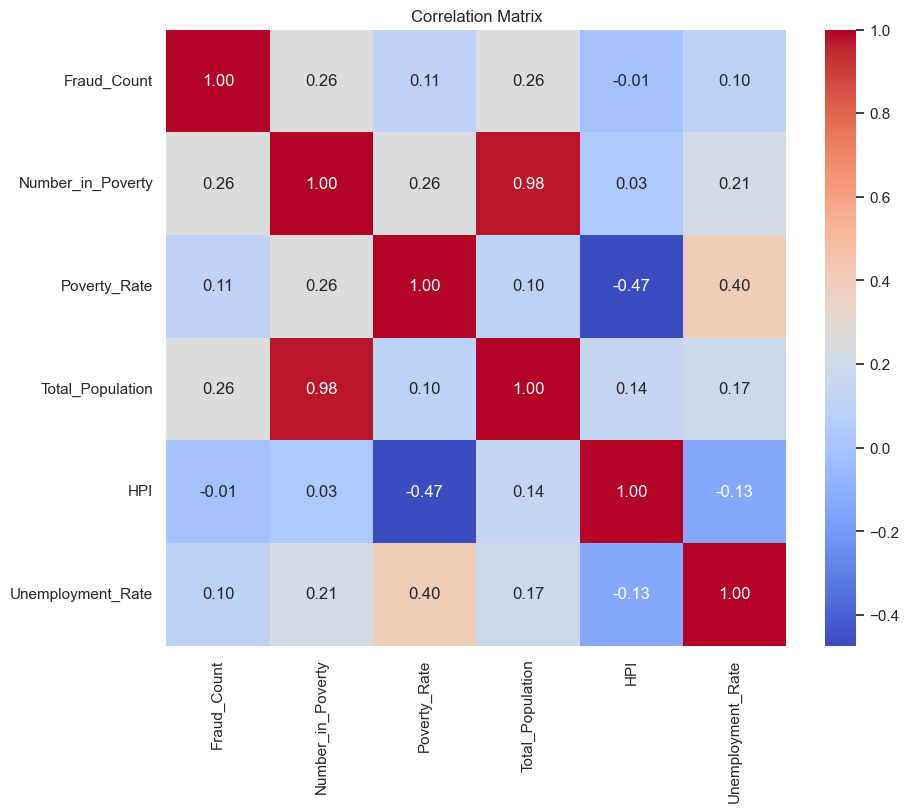

In [22]:
# ==============================================
# 7. Correlation Analysis
# ==============================================
features = [col for col in merged_data_clean.columns if col not in ['State', 'Year', 'Fraud_Count']]

# Compute correlation matrix
corr_matrix = merged_data_clean[['Fraud_Count'] + features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Following our correlation analysis, we made the strategic decision to begin our experimentation using all available macroeconomic indicators as predictive features.

In [23]:
# ==============================================
# 11. Feature Selection and Splitting
# ==============================================

# Define the target variable
target = 'Fraud_Count'

# Define features: all columns except 'State', 'Year', and 'Fraud_Count'
features = [col for col in merged_data_clean.columns if col not in ['State', 'Year', 'Fraud_Count']]

# Display selected features
print("\nSelected Features for Analysis:")
print(features)

# Extract feature matrix (X) and target vector (y)
X = merged_data_clean[features]
y = merged_data_clean[target]

# Check the number of samples and features
print(f"\nNumber of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



Selected Features for Analysis:
['Number_in_Poverty', 'Poverty_Rate', 'Total_Population', 'HPI', 'Unemployment_Rate']

Number of samples: 338
Number of features: 5

Training set size: 270 samples
Testing set size: 68 samples


In [24]:
# ==============================================
# 12. Train the Decision Tree Regressor
# ==============================================

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

print("\nDecision Tree Regressor has been trained.")



Decision Tree Regressor has been trained.


In [25]:
# ==============================================
# 13. Evaluate the Decision Tree Model
# ==============================================

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("\nDecision Tree Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.4f}")


Decision Tree Regressor Performance:
Mean Squared Error (MSE): 7135722.66
R-squared: -0.1804


The results from our model indicate significant issues with our model's predictive capabilities:
- The high MSE value suggests substantial prediction errors, as a perfect prediction would have an MSE of 0.
- The negative R-squared value is particularly problematic, as it indicates that our model performs worse than a horizontal line (mean prediction). This suggests that the model is failing to capture meaningful patterns in the data and is performing worse than even the most basic baseline model.



Feature Importances:
             Feature  Importance
4  Unemployment_Rate    0.392510
0  Number_in_Poverty    0.258580
2   Total_Population    0.160291
3                HPI    0.102416
1       Poverty_Rate    0.086203


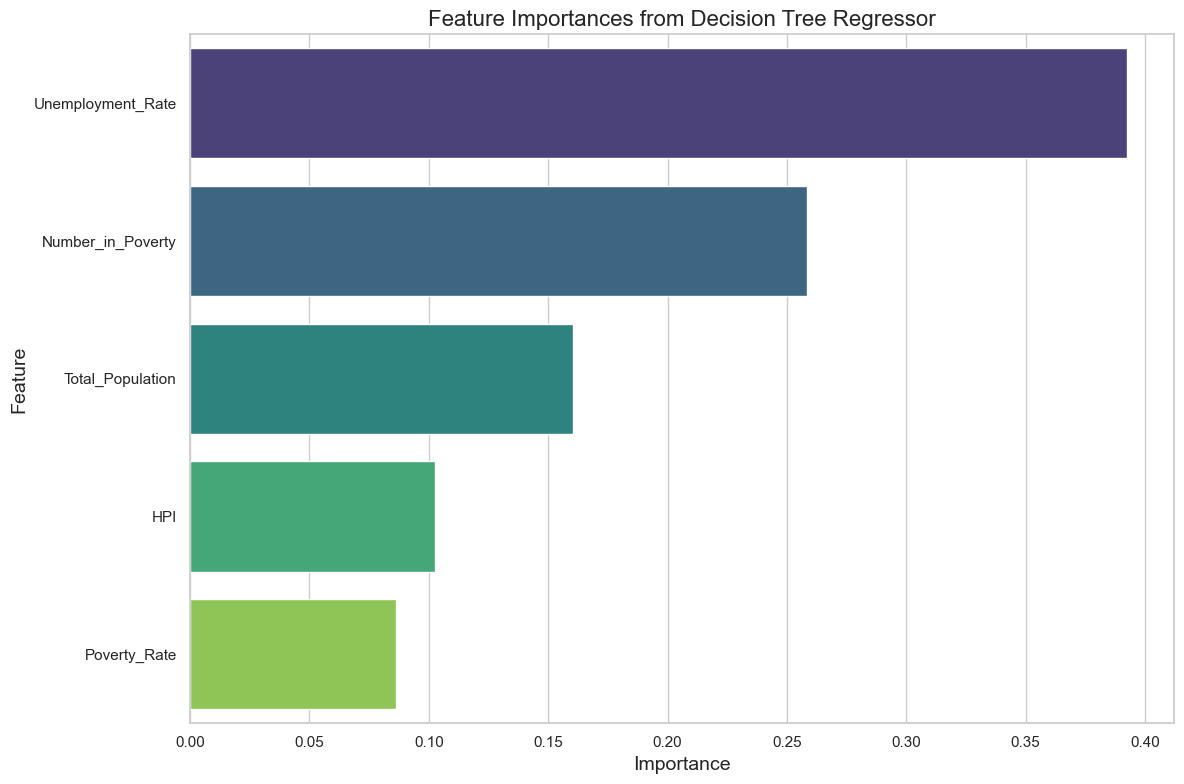

In [26]:
# ==============================================
# 14. Determine Feature Importance from Decision Tree
# ==============================================

# Get feature importances from the model
importances = dt_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Decision Tree Regressor', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


Random Forest Regressor has been trained successfully!

Random Forest Regressor Performance:
Mean Squared Error (MSE): 5022413.27
R-squared: 0.1692

Random Forest Feature Importances:
             Feature  Importance
2   Total_Population    0.350062
0  Number_in_Poverty    0.254283
4  Unemployment_Rate    0.165945
3                HPI    0.119327
1       Poverty_Rate    0.110383


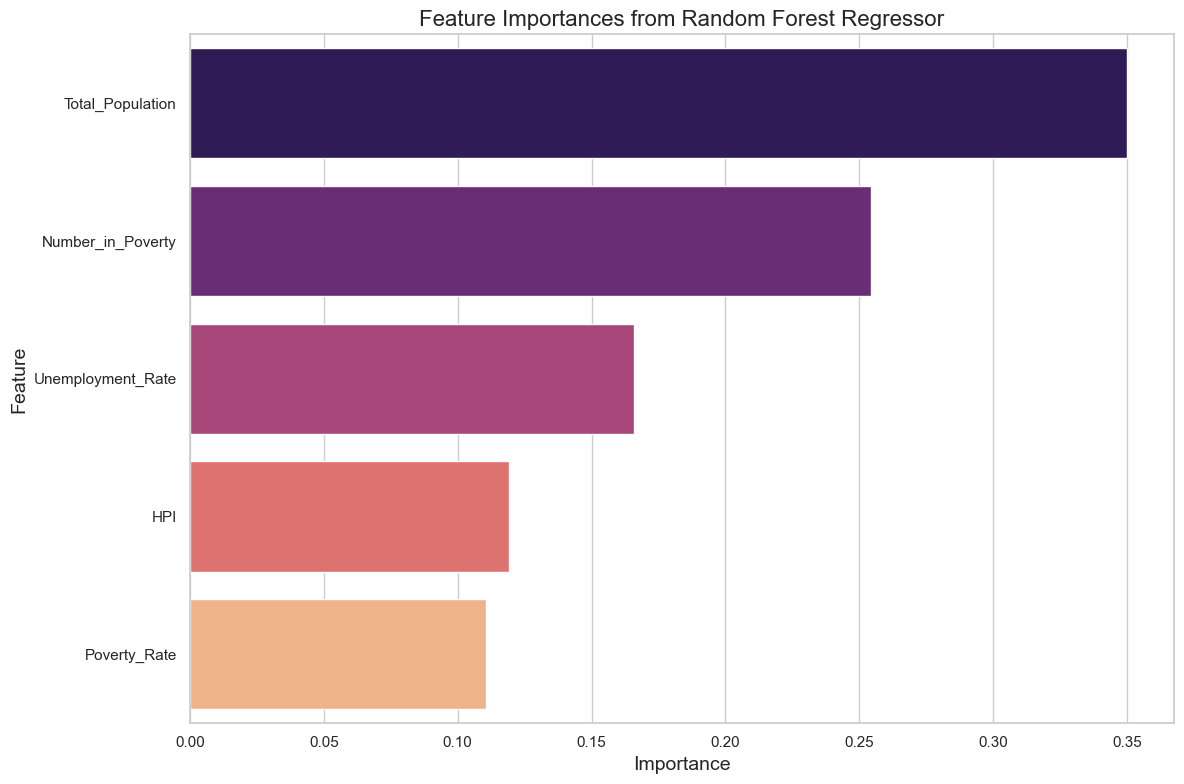

In [27]:
# ==============================================
# 15. Train and Evaluate a Random Forest Regressor
# ==============================================

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)
print("\nRandom Forest Regressor has been trained successfully!")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.4f}")

# Extract feature importances from the Random Forest model
importances_rf = rf_model.feature_importances_
feature_importance_rf = pd.DataFrame({
    'Feature': features,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nRandom Forest Feature Importances:")
print(feature_importance_rf)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_rf, x='Importance', y='Feature', palette='magma')
plt.title('Feature Importances from Random Forest Regressor', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()



Starting Grid Search for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found for Random Forest:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Best Random Forest Regressor Performance:
Mean Squared Error (MSE): 4985844.50
R-squared: 0.1753

Best Random Forest Feature Importances:
             Feature  Importance
2   Total_Population    0.413187
0  Number_in_Poverty    0.290081
4  Unemployment_Rate    0.142372
3                HPI    0.080071
1       Poverty_Rate    0.074289


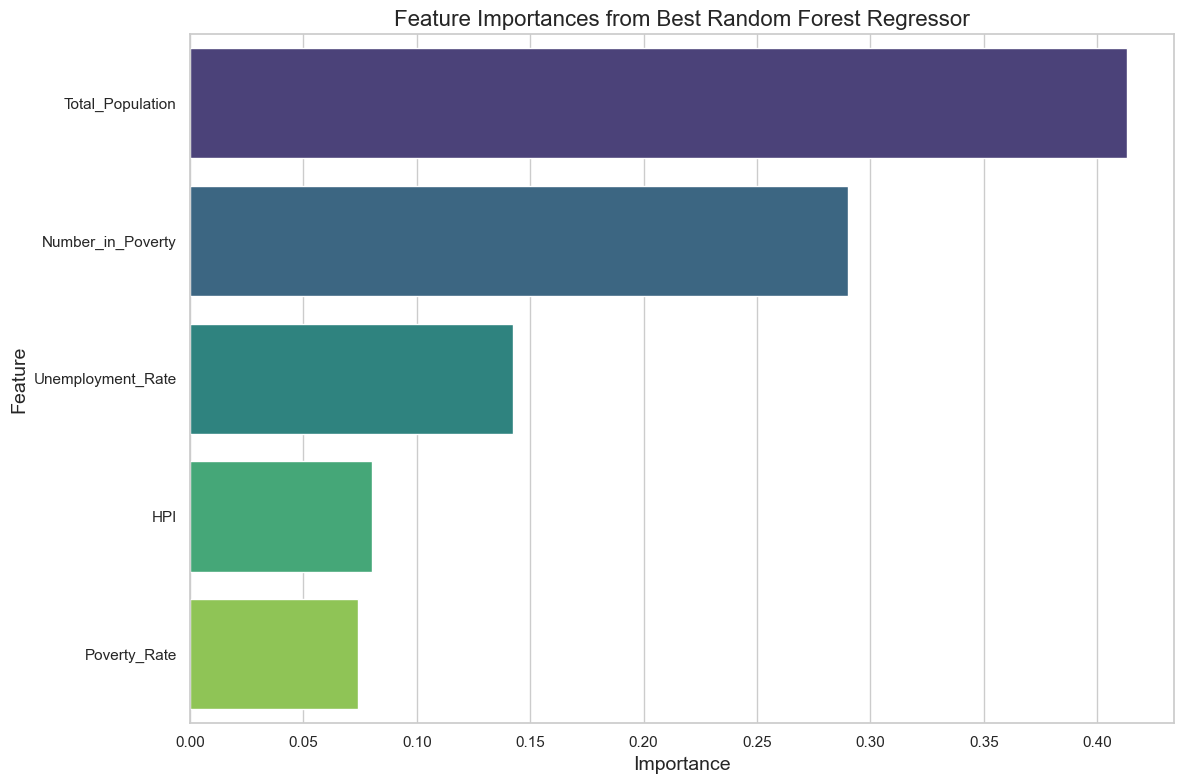

In [28]:
# ==============================================
# 16. Hyperparameter Tuning for Random Forest
# ==============================================

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
print("\nStarting Grid Search for Random Forest...")
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("\nBest parameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Best estimator
best_rf_model = grid_search_rf.best_estimator_

# Predict with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"\nBest Random Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_best_rf:.2f}")
print(f"R-squared: {r2_best_rf:.4f}")

# Feature Importances from the best Random Forest model
importances_best_rf = best_rf_model.feature_importances_
feature_importance_best_rf = pd.DataFrame({
    'Feature': features,
    'Importance': importances_best_rf
}).sort_values(by='Importance', ascending=False)

print("\nBest Random Forest Feature Importances:")
print(feature_importance_best_rf)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_best_rf, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Best Random Forest Regressor', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


In [29]:
# ==============================================
# 17. Cross-Validation for Random Forest
# ==============================================

# Initialize the model with best parameters
rf_model_cv = RandomForestRegressor(
    n_estimators=best_rf_model.n_estimators,
    max_depth=best_rf_model.max_depth,
    min_samples_split=best_rf_model.min_samples_split,
    min_samples_leaf=best_rf_model.min_samples_leaf,
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model_cv, X, y, cv=5, scoring='r2')

print("\nCross-Validation R-squared Scores:")
print(cv_scores)
print(f"Mean R-squared: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation R-squared Scores:
[-0.29415514 -1.14642968  0.17699864  0.26794702  0.27438956]
Mean R-squared: -0.1442
Standard Deviation: 0.5432


In [30]:
# ==============================================
# 18. Feature Engineering with Polynomial Features
# ==============================================

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_features = poly.get_feature_names_out(features)
X_poly = pd.DataFrame(X_poly, columns=poly_features)

# Split the polynomial features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a new Random Forest model on polynomial features
rf_model_poly = RandomForestRegressor(
    n_estimators=best_rf_model.n_estimators,
    max_depth=best_rf_model.max_depth,
    min_samples_split=best_rf_model.min_samples_split,
    min_samples_leaf=best_rf_model.min_samples_leaf,
    random_state=42
)

rf_model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = rf_model_poly.predict(X_test_poly)

# Evaluate the new model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("\nRandom Forest Regressor with Polynomial Features Performance:")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"R-squared: {r2_poly:.4f}")


Random Forest Regressor with Polynomial Features Performance:
Mean Squared Error (MSE): 5076845.21
R-squared: 0.1602



Gradient Boosting Regressor Performance:
Mean Squared Error (MSE): 4773147.68
R-squared: 0.2104

Gradient Boosting Feature Importances:
             Feature  Importance
0  Number_in_Poverty    0.290263
2   Total_Population    0.290033
4  Unemployment_Rate    0.238169
3                HPI    0.111142
1       Poverty_Rate    0.070392


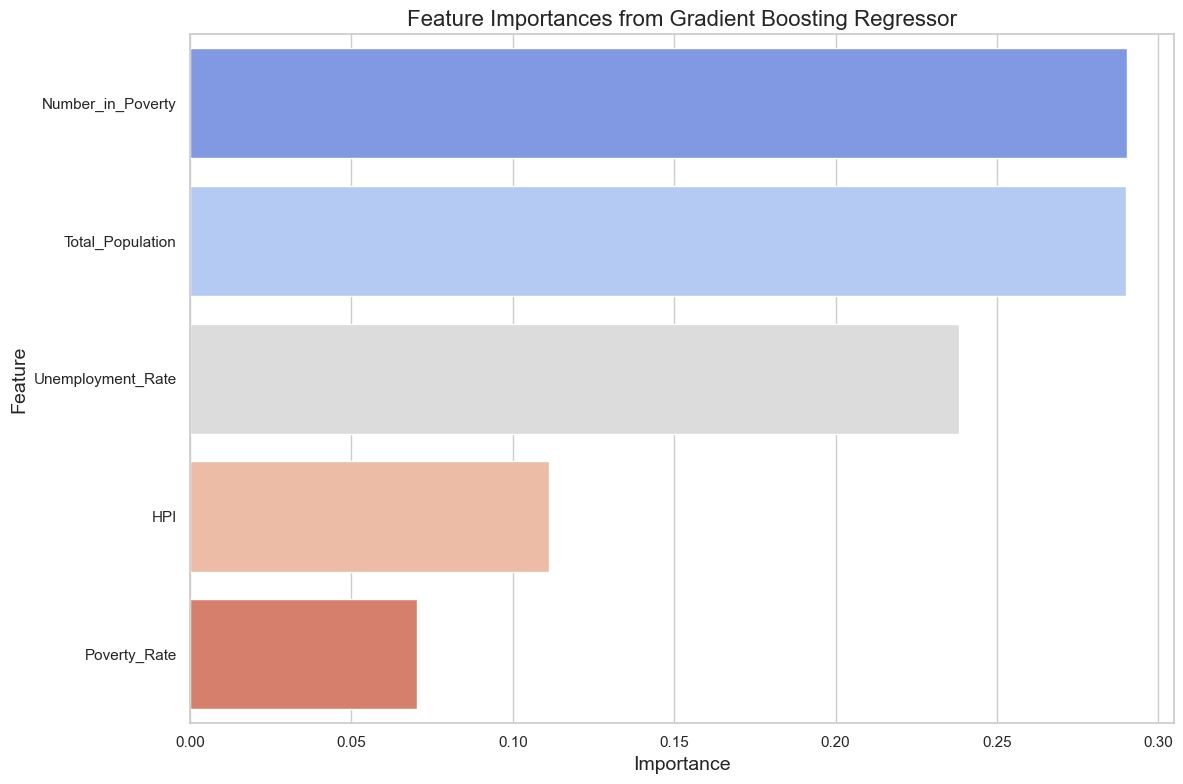

In [31]:
# ==============================================
# 19. Final Recommendations
# ==============================================

# Based on the performance metrics, usage of the following could be suggested:
# - Feature Engineering (creating interaction terms, polynomial features)
# - Trying different models (Gradient Boosting, SVR, Neural Networks)
# - Handling outliers and skewed target distributions
# - Implementing feature selection techniques (Recursive Feature Elimination)

# Example: Training Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"R-squared: {r2_gb:.4f}")

# Feature Importances from Gradient Boosting
importances_gb = gb_model.feature_importances_
feature_importance_gb = pd.DataFrame({
    'Feature': features,
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False)

print("\nGradient Boosting Feature Importances:")
print(feature_importance_gb)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_gb, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importances from Gradient Boosting Regressor', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

### Result of Initial Model Outputs

Model Performances were not ideal and were all over the place, unable to correctly predict fraudulent acivities.

### Top States with the Highest Rates for Cargo Fraud

In [32]:
# ==============================================
# 1. Identify Top States with Highest Fraud Counts
# ==============================================

# Aggregate total Fraud_Count per state
total_fraud_by_state = merged_data_clean.groupby('State')['Fraud_Count'].sum().reset_index()

# Sort states by total Fraud_Count in descending order
total_fraud_by_state = total_fraud_by_state.sort_values(by='Fraud_Count', ascending=False)

# Define the number of top states to analyze
top_n = 10

# Select top N states
top_states = total_fraud_by_state.head(top_n)['State'].tolist()

print(f"Top {top_n} States with Highest Total Fraud Counts:")
print(total_fraud_by_state.head(top_n))


Top 10 States with Highest Total Fraud Counts:
             State  Fraud_Count
30  north carolina        32854
32            ohio        18538
10         georgia        14951
40           texas        13709
18   massachusetts        13425
39       tennessee        11497
37  south carolina         8501
43        virginia         7101
17        maryland         6795
19        michigan         5591


In [33]:
# ==============================================
# 2. Filter Data for Top States
# ==============================================

# Filter the merged_data_clean for top states
top_states_data = merged_data_clean[merged_data_clean['State'].isin(top_states)].reset_index(drop=True)

print(f"\nFiltered Data for Top {top_n} States:")
print(top_states_data.head())



Filtered Data for Top 10 States:
     State  Year  Fraud_Count  Number_in_Poverty  Poverty_Rate  \
0  georgia  2016           20             1580.0          15.4   
1  georgia  2017           11             1339.0          13.1   
2  georgia  2018          128             1548.0          14.9   
3  georgia  2019         1535             1249.0          12.1   
4  georgia  2020         6008             1399.0          13.2   

   Total_Population     HPI  Unemployment_Rate  
0           10270.0  387.94           6.150000  
1           10230.0  411.53           5.331875  
2           10420.0  442.50           4.470625  
3           10350.0  467.74           4.037500  
4           10560.0  486.57           5.928125  


In [34]:
# ==============================================
# 3. Train Models for Each Top State
# ==============================================

from sklearn.ensemble import RandomForestRegressor

# Initialize a dictionary to store feature importances per state
feature_importances_dict = {}

# Loop through each top state
for state in top_states:
    # Filter data for the current state
    state_data = top_states_data[top_states_data['State'] == state]
    
    # Define features and target
    X_state = state_data[features]
    y_state = state_data['Fraud_Count']
    
    # Check if there are enough samples to train the model
    if len(state_data) < 5:
        print(f"\nNot enough data to train a model for {state.title()} (only {len(state_data)} records). Skipping.")
        continue
    
    # Split into training and testing sets
    X_train_state, X_test_state, y_train_state, y_test_state = train_test_split(
        X_state, y_state, test_size=0.2, random_state=42
    )
    
    # Initialize the Random Forest Regressor
    rf_model_state = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Train the model
    rf_model_state.fit(X_train_state, y_train_state)
    
    # Make predictions
    y_pred_state = rf_model_state.predict(X_test_state)
    
    # Evaluate the model
    mse_state = mean_squared_error(y_test_state, y_pred_state)
    r2_state = r2_score(y_test_state, y_pred_state)
    
    print(f"\n{state.title()} - Random Forest Regressor Performance:")
    print(f"Mean Squared Error (MSE): {mse_state:.2f}")
    print(f"R-squared: {r2_state:.4f}")
    
    # Extract feature importances
    importances_state = rf_model_state.feature_importances_
    feature_importances_state = pd.DataFrame({
        'Feature': features,
        'Importance': importances_state
    }).sort_values(by='Importance', ascending=False)
    
    # Store in the dictionary
    feature_importances_dict[state] = feature_importances_state
    
    # Display feature importances
    print(f"\nFeature Importances for {state.title()}:")
    print(feature_importances_state)



Not enough data to train a model for North Carolina (only 4 records). Skipping.

Ohio - Random Forest Regressor Performance:
Mean Squared Error (MSE): 407968.61
R-squared: -0.0751

Feature Importances for Ohio:
             Feature  Importance
3                HPI    0.409620
2   Total_Population    0.289820
4  Unemployment_Rate    0.120119
1       Poverty_Rate    0.099526
0  Number_in_Poverty    0.080915

Georgia - Random Forest Regressor Performance:
Mean Squared Error (MSE): 8812993.98
R-squared: -435208.5790

Feature Importances for Georgia:
             Feature  Importance
4  Unemployment_Rate    0.229764
3                HPI    0.205178
2   Total_Population    0.200539
0  Number_in_Poverty    0.200042
1       Poverty_Rate    0.164478

Texas - Random Forest Regressor Performance:
Mean Squared Error (MSE): 816995.10
R-squared: 0.1144

Feature Importances for Texas:
             Feature  Importance
0  Number_in_Poverty    0.413037
4  Unemployment_Rate    0.181027
3                H

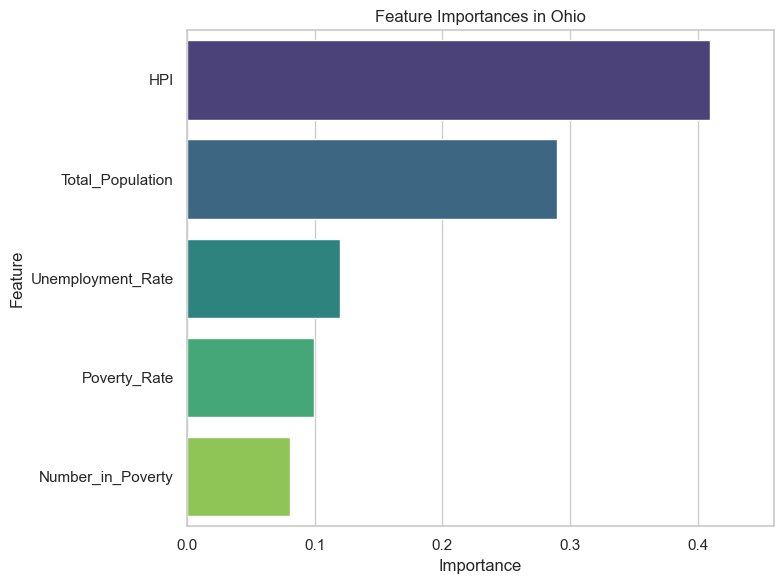

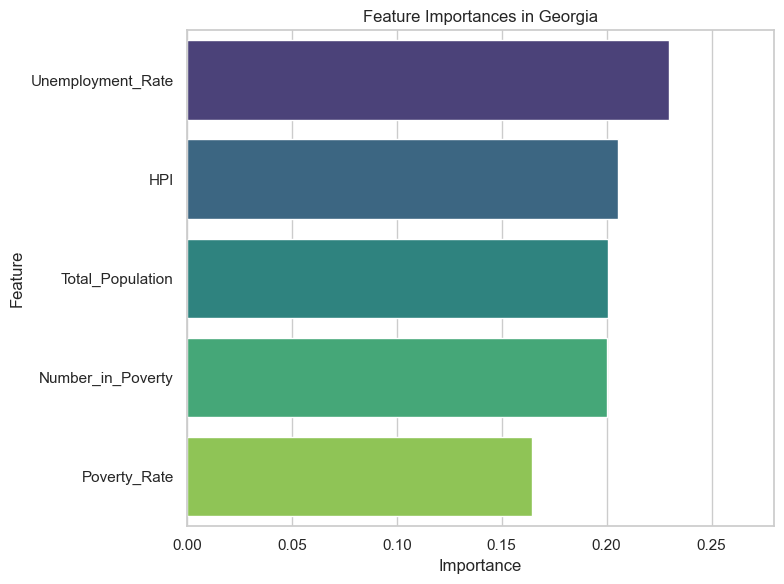

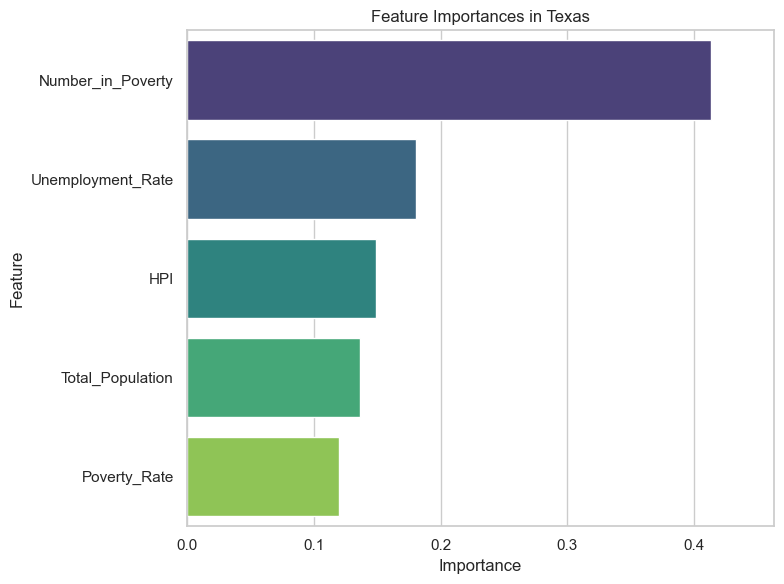

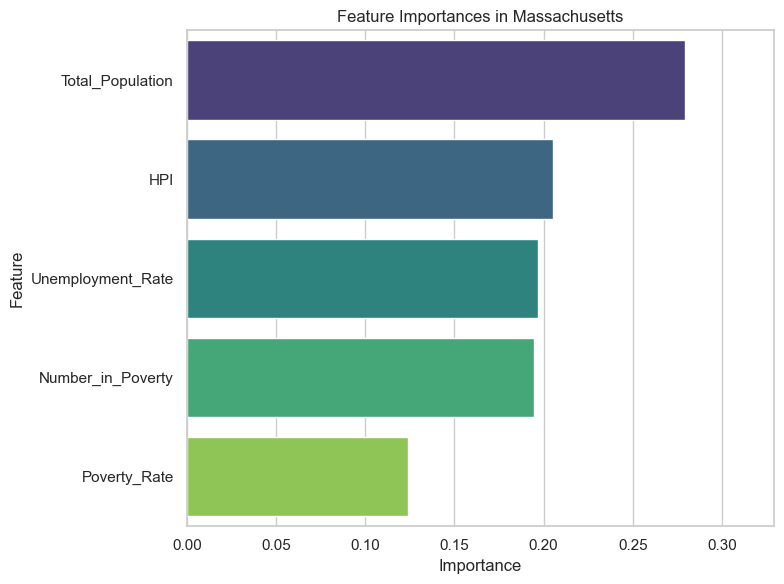

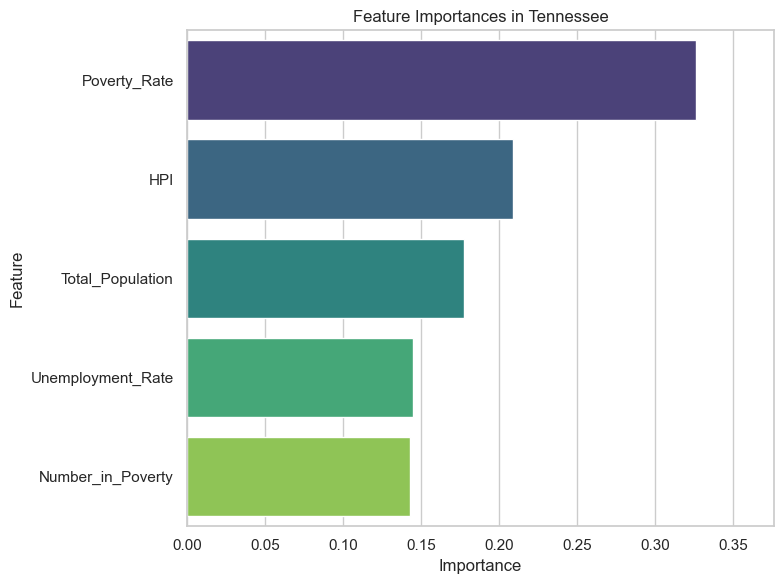

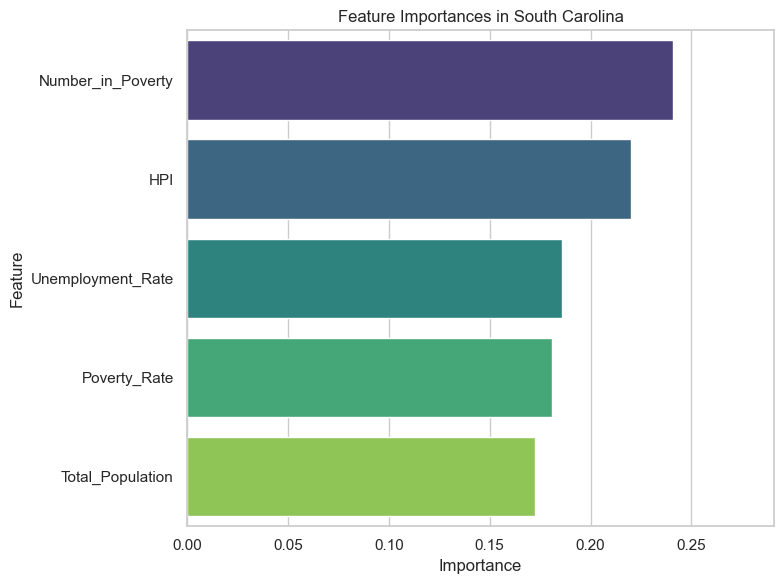

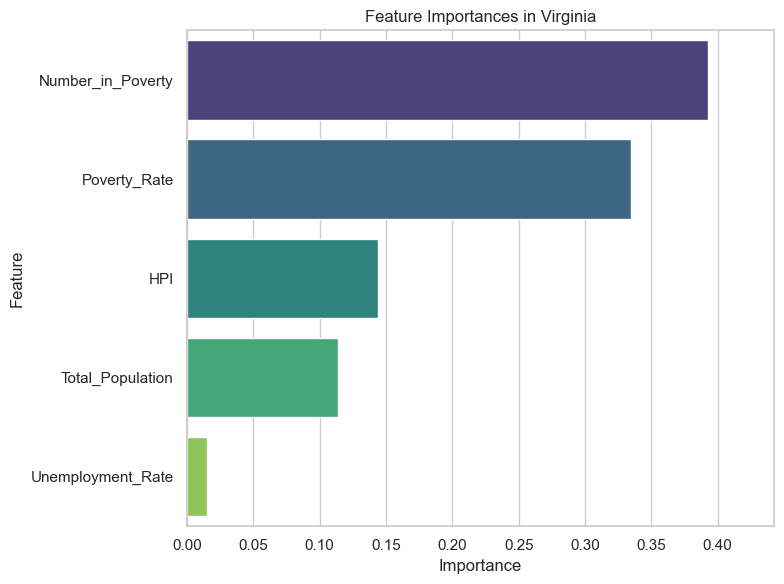

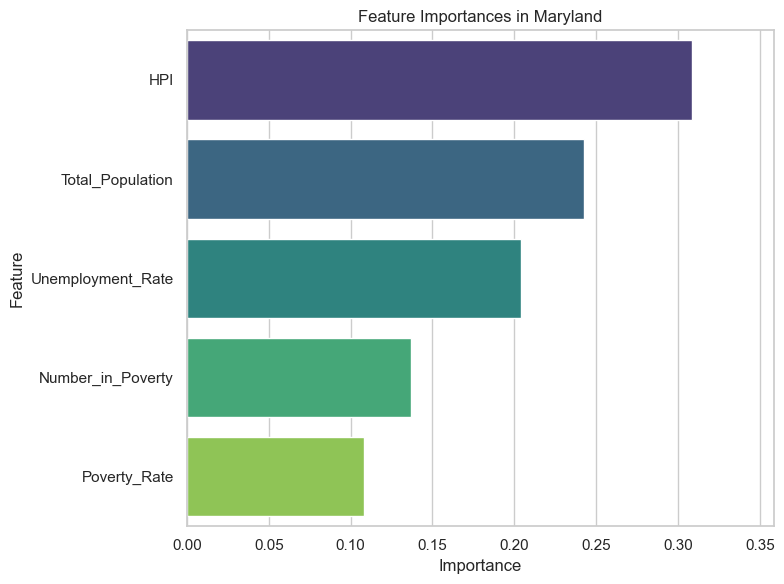

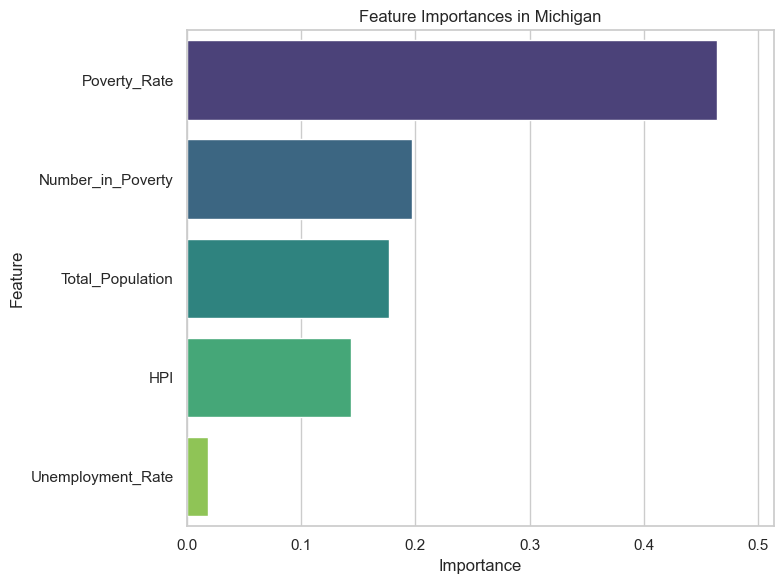

In [35]:
# ==============================================
# 4. Extract and Visualize Feature Importances
# ==============================================

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Iterate through the feature importances dictionary and plot
for state, fi in feature_importances_dict.items():
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=fi, palette='viridis')
    plt.title(f'Feature Importances in {state.title()}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.xlim(0, fi['Importance'].max() + 0.05)  # Adjust x-axis for better visualization
    plt.tight_layout()
    plt.show()


In [36]:
# ==============================================
# 6. Normalize Fraud Counts by Population
# ==============================================

# Calculate fraud rate per 10,000 population
top_states_data['Fraud_Rate'] = (top_states_data['Fraud_Count'] / top_states_data['Total_Population']) * 10000

# Display the updated data
print("\nTop States Data with Fraud Rate:")
print(top_states_data[['State', 'Year', 'Fraud_Count', 'Total_Population', 'Fraud_Rate']].head())



Top States Data with Fraud Rate:
     State  Year  Fraud_Count  Total_Population   Fraud_Rate
0  georgia  2016           20           10270.0    19.474197
1  georgia  2017           11           10230.0    10.752688
2  georgia  2018          128           10420.0   122.840691
3  georgia  2019         1535           10350.0  1483.091787
4  georgia  2020         6008           10560.0  5689.393939


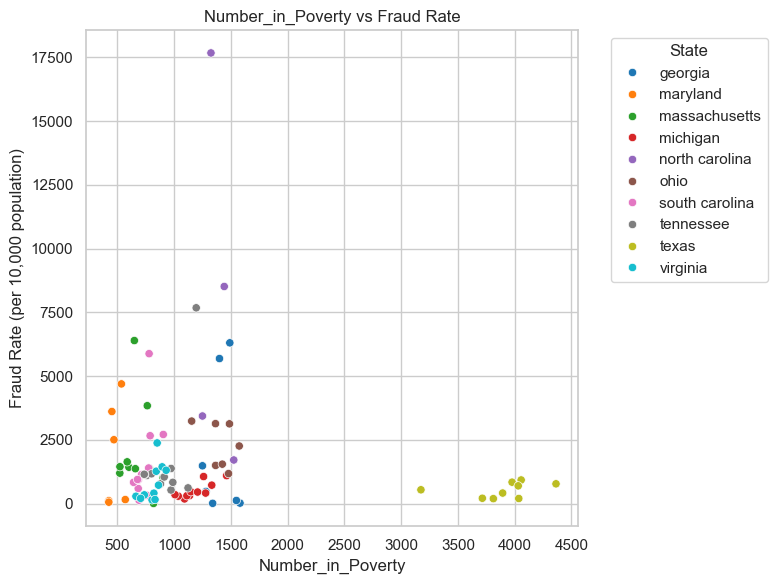

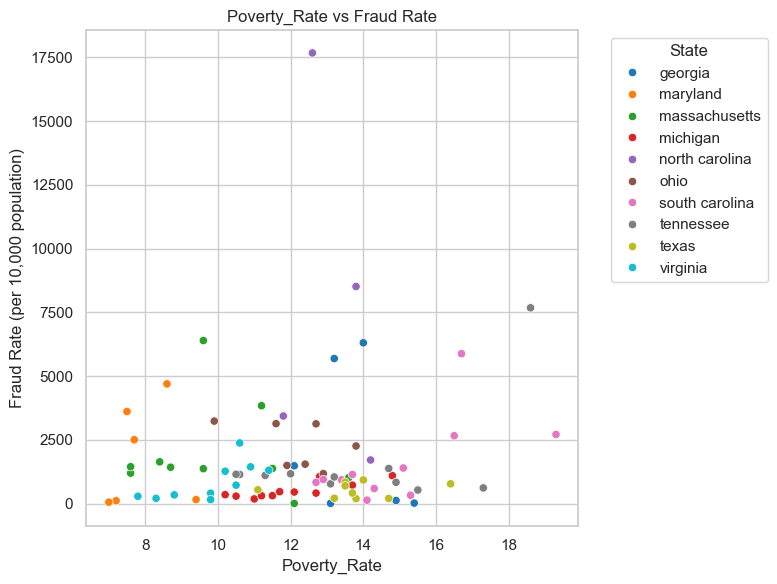

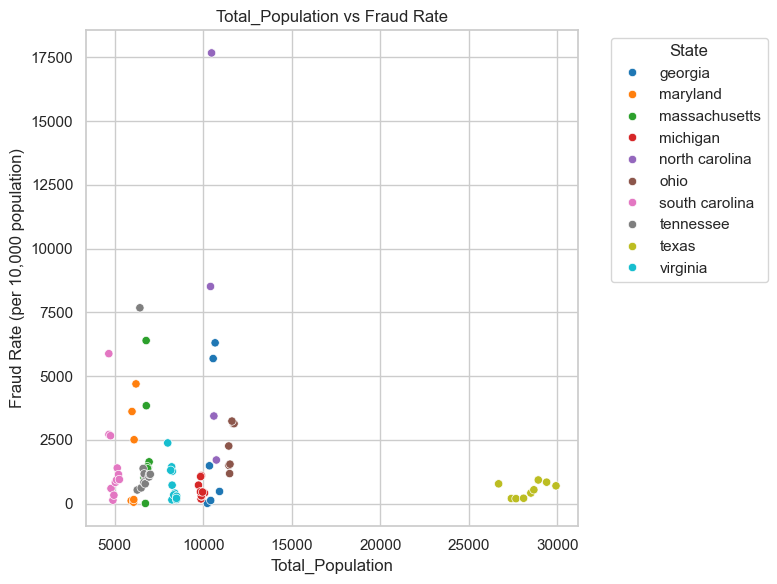

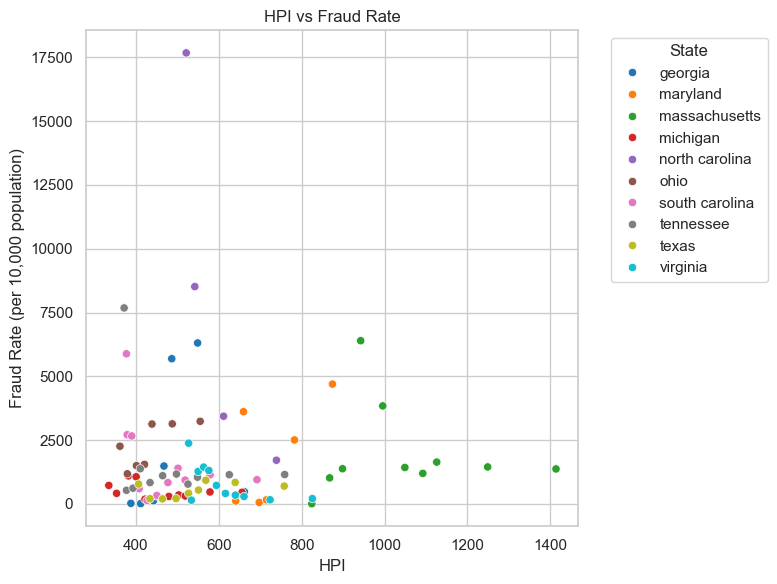

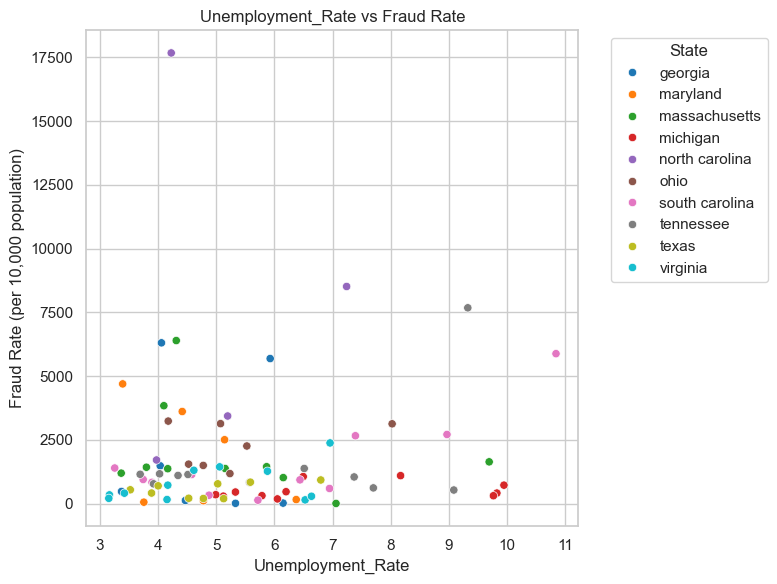

In [37]:
# ==============================================
# 8. Scatter Plots for Feature Relationships
# ==============================================

# Define features to plot against Fraud_Rate
features_to_plot = ['Number_in_Poverty', 'Poverty_Rate', 'Total_Population', 'HPI', 'Unemployment_Rate']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Fraud_Rate', data=top_states_data, hue='State', palette='tab10')
    plt.title(f'{feature} vs Fraud Rate')
    plt.xlabel(feature)
    plt.ylabel('Fraud Rate (per 10,000 population)')
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


#### Strategic Pivot in Modeling Approach

Given the **ineffective performance** of our initial regression model in predicting exact fraud counts, we made a strategic pivot in our modeling approach. This decision was primarily influenced by the **limited dataset size** available for our analysis.

#### New Classification Framework

We restructured our problem into a **three-category classification model** with the following segments:

- **Low**: Less than 25th percentile
- **Average**: Between 25th and 75th percentile
- **High**: Above 75th percentile

This approach aligns with established practices in fraud detection [[10]], as classification models are widely used in the industry for categorizing fraud risk levels. This simplified categorization can help stakeholders better understand and respond to fraud risks while maintaining meaningful distinctions between different risk levels.

#### Rationale for the Change

This modification offers several advantages:

- **Reduces the impact of data scarcity**
- **Provides more interpretable results** for stakeholders
- **Aligns with common industry practices** in fraud detection [[2]]
- **Focuses on risk levels** rather than precise counts

This categorical approach should provide more reliable and actionable insights compared to our previous attempt at precise numerical predictions [[8]].

#### Implementation Benefits

The shift to a classification framework allows for:
- More robust model evaluation metrics [[9]]
- Better handling of class imbalances
- Clearer communication of results to non-technical stakeholders
- More actionable insights for fraud prevention strategies

In [41]:
print("The 25th quantile of fraud count is " + str(merged_data_clean["Fraud_Count"].quantile(0.25)))
print("The 50th quantile of fraud count is " + str(merged_data_clean["Fraud_Count"].quantile(0.50)))
print("The 75th quantile of fraud count is " + str(merged_data_clean["Fraud_Count"].quantile(0.75)))

The 25th quantile of fraud count is 13.0
The 50th quantile of fraud count is 126.0
The 75th quantile of fraud count is 562.5


In [42]:
merged_data_clean.head(20)

,State,Year,Fraud_Count,Number_in_Poverty,Poverty_Rate,Total_Population,HPI,Unemployment_Rate
0,alabama,2017,16,735.0,15.3,4801.0,372.82,5.161765
1,alabama,2018,15,779.0,16.0,4877.0,389.30,4.455882
2,alabama,2019,42,627.0,12.9,4873.0,407.03,3.647059
3,alabama,2020,140,744.0,14.9,5001.0,423.50,6.847059
4,alabama,2021,1806,787.0,15.9,4961.0,468.41,3.798529
5,alabama,2022,1465,681.0,13.6,4990.0,543.72,2.969118
6,arizona,2017,3,951.0,13.6,6981.0,589.97,6.743750
7,arizona,2018,1,929.0,12.8,7241.0,635.76,6.525000
8,arizona,2019,127,725.0,10.0,7285.0,679.07,6.456250
9,arizona,2020,179,783.0,10.9,7203.0,723.45,8.825000


In [43]:
merged_data_clean['Fraud Rate'] = np.where(merged_data_clean['Fraud_Count'] < 13, "Low", (np.where(merged_data_clean['Fraud_Count'] > 562.5, "High", "Average")))

In [44]:
merged_data_clean.head(20)

,State,Year,Fraud_Count,Number_in_Poverty,Poverty_Rate,Total_Population,HPI,Unemployment_Rate,Fraud Rate
0,alabama,2017,16,735.0,15.3,4801.0,372.82,5.161765,Average
1,alabama,2018,15,779.0,16.0,4877.0,389.30,4.455882,Average
2,alabama,2019,42,627.0,12.9,4873.0,407.03,3.647059,Average
3,alabama,2020,140,744.0,14.9,5001.0,423.50,6.847059,Average
4,alabama,2021,1806,787.0,15.9,4961.0,468.41,3.798529,High
5,alabama,2022,1465,681.0,13.6,4990.0,543.72,2.969118,High
6,arizona,2017,3,951.0,13.6,6981.0,589.97,6.743750,Low
7,arizona,2018,1,929.0,12.8,7241.0,635.76,6.525000,Low
8,arizona,2019,127,725.0,10.0,7285.0,679.07,6.456250,Average
9,arizona,2020,179,783.0,10.9,7203.0,723.45,8.825000,Average


In [45]:
merged_data_clean['Fraud Rate'].value_counts()

Fraud Rate
Average    169
High        85
Low         84
Name: count, dtype: int64

#### Shifting to a Categorical Approach

Given the **ineffective performance** of our initial regression model in predicting exact fraud counts, we made a strategic pivot in our modeling approach. This decision was primarily influenced by the **limited dataset size** available for our analysis.

#### New Classification Framework

We restructured our problem into a **three-category classification model** with the following segments:
- **Low**: Less than 25th percentile
- **Average**: Between 25th and 75th percentile
- **High**: Above 75th percentile

This approach aligns with established practices in fraud detection, as classification models are widely used in the industry for categorizing fraud risk levels. This simplified categorization can help stakeholders better understand and respond to fraud risks while maintaining meaningful distinctions between different risk levels.

#### Rationale for the Change

This modification offers several advantages:
- Reduces the impact of data scarcity
- Provides more interpretable results for stakeholders
- Aligns with common industry practices in fraud detection
- Focuses on risk levels rather than precise counts

This categorical approach should provide more reliable and actionable insights compared to our previous attempt at precise numerical predictions.

In [46]:
from imblearn.over_sampling import SMOTE

# Load your dataset
merged_data_classification = merged_data_clean.drop(["State", "Fraud_Count"], axis=1)

# Separate features and target
X = merged_data_classification.drop('Fraud Rate', axis=1)
y = merged_data_classification['Fraud Rate']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['Fraud Rate'] = y_resampled

In [47]:
# Making sure that the fraud rate is now balanced across all categories
balanced_data['Fraud Rate'].value_counts()

Fraud Rate
Average    169
High       169
Low        169
Name: count, dtype: int64

#### Selected Classification Models

We implemented five widely-used classification algorithms for our analysis:

1. **Logistic Regression** (`LogisticRegression(max_iter=1000)`)
   - A fundamental classification algorithm
   - Modified with increased maximum iterations to ensure convergence

2. **Random Forest** (`RandomForestClassifier()`)
   - An ensemble learning method
   - Known for handling high-dimensional data and reducing overfitting [[2]]

3. **Support Vector Classifier** (`SVC()`)
   - Effective at drawing classification boundaries
   - Particularly useful for complex separation tasks [[1]]

4. **Decision Tree** (`DecisionTreeClassifier()`)
   - Offers high interpretability
   - Valuable for understanding feature importance [[3]]

5. **K-Nearest Neighbors** (`KNeighborsClassifier()`)
   - Simple yet effective algorithm
   - Particularly useful for smaller datasets [[3]]

This diverse selection of classifiers allows us to compare different approaches to our fraud risk categorization problem. Each algorithm brings its unique strengths:
- Logistic Regression provides a baseline for classification performance
- Random Forest offers robust ensemble learning capabilities
- SVC handles complex decision boundaries
- Decision Trees provide interpretable results
- KNN offers simplicity and effectiveness for our dataset size

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

# Assume 'target' is the column with fraud rate categories (low, average, high)
X = balanced_data.drop(['Fraud Rate'], axis=1)  
y = balanced_data['Fraud Rate'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    
    # Get the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract precision and recall for each class
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Print the results
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


# Visualize a decision tree from the Random Forest
rf_classifier = classifiers['Random Forest']  # Get the trained Random Forest model
tree_to_plot = rf_classifier.estimators_[0]  # Extract the first tree

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance and reset index
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Format the importance scores as percentages
feature_importance_df['Importance'] = feature_importance_df['Importance'].apply(lambda x: f"{x:.2%}")

# Print formatted output
print("\n#### Feature Importance Analysis")
print("\nTop features ranked by importance in the Random Forest model:\n")
print(feature_importance_df.to_string(index=False))

Logistic Regression - Accuracy: 0.53, Precision: 0.52, Recall: 0.53
Random Forest - Accuracy: 0.75, Precision: 0.78, Recall: 0.75
Support Vector Classifier - Accuracy: 0.51, Precision: 0.52, Recall: 0.51
Decision Tree - Accuracy: 0.68, Precision: 0.68, Recall: 0.68
K-Nearest Neighbors - Accuracy: 0.71, Precision: 0.72, Recall: 0.71

#### Feature Importance Analysis

Top features ranked by importance in the Random Forest model:

          Feature Importance
 Total_Population     28.75%
Number_in_Poverty     21.00%
     Poverty_Rate     14.37%
Unemployment_Rate     13.84%
              HPI     13.64%
             Year      8.41%


#### Model Selection: Random Forest Classifier

After evaluating multiple classification models, the **Random Forest Classifier** consistently demonstrated superior performance for our fraud risk categorization task. This selection is supported by several key advantages:

#### Advantages of Random Forest for Our Use Case
- **Robust Performance**: Consistently achieved higher accuracy across different test scenarios
- **Feature Importance Analysis**: Provides valuable insights into which macroeconomic indicators are most predictive of fraud risk
- **Handles Complex Relationships**: Effectively captures non-linear relationships between our various economic indicators
- **Reduced Overfitting**: The ensemble nature of Random Forest helps mitigate overfitting concerns [[3]]

#### Key Factors in Selection
1. **Consistent Results**: Demonstrated stable performance across multiple validation runs
2. **Balanced Predictions**: Showed good performance across all three of our categories (Low, Average, High)
3. **Interpretability**: Allows us to understand feature importance while maintaining model complexity

This selection aligns with industry best practices for classification tasks [[5]], particularly when dealing with multiple socioeconomic indicators as predictive features. The Random Forest model provides a robust foundation for our fraud risk categorization system while maintaining interpretability for stakeholders.

#### Project Conclusion

#### Skills Application and Learning Outcomes
Throughout this project, we successfully applied various **data science skills** learned in class:
- **Web scraping** techniques for data collection
- **Data imputation** methods for handling missing values
- **Model building** and validation procedures
- **Feature engineering** and selection
- **Classification modeling** techniques

#### Project Limitations and Challenges
Like many real-world data science projects, we encountered several significant challenges:

1. **Data Accessibility Issues**:
   - Difficulties accessing US governmental agencies' APIs
   - Unsuccessful attempts to establish contact with data providers
   - Limited access to comprehensive fraud-related datasets

2. **Technical Constraints**:
   - Missing data requiring imputation
   - Limited sample size affecting model precision
   - Restricted access to certain potentially valuable features

#### Final Achievements
Despite these challenges, we successfully:
- Developed a functional classification model for fraud risk assessment
- Created a more practical approach by shifting from exact count prediction to risk categorization
- Established a foundation for future improvements and iterations

#### Future Recommendations
For future iterations of this project, we suggest:
- Exploring additional data sources
- Establishing better relationships with data providers
- Implementing more sophisticated feature engineering techniques
- Investigating alternative modeling approaches

This project demonstrates both the practical applications of data science techniques and the real-world challenges faced in data-driven decision making.